# Import libraries and files

In [97]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import shapiro 
from scipy.stats import lognorm
from sklearn.impute import KNNImputer
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
df_general = pd.read_csv("/Users/kayiko98/Documents/boe_assessment/data/DataScientist_009749_Dataset.xlsx - Dataset 1 - General.csv", header=[0,1])

In [3]:
df_underwriting = pd.read_csv("/Users/kayiko98/Documents/boe_assessment/data/DataScientist_009749_Dataset.xlsx - Dataset 2 - Underwriting.csv", header=[0,1])

# Cleaning the dataset

## Dataset 1 - General

In [4]:
# Combine rows 1 and 2 and make them the header
df_general.columns = df_general.columns.map(lambda h: ' '.join(h).replace(' ', '_').replace('__', '_'))

In [5]:
df_general = df_general.rename(columns={"Unnamed:_0_level_0_Unnamed:_0_level_1" :"firm"})

In [6]:
# Rename column names to lower case
df_general = df_general.rename(columns=lambda x: x.lower())

In [7]:
# Format strings in column "firm" as we will merge this later
df_general['firm'] = df_general['firm'].apply(lambda x: x.replace(' ', '_').lower().strip())

In [8]:
df_general.head(5)

firm  nwp_(£m)_2016ye  nwp_(£m)_2017ye  nwp_(£m)_2018ye  nwp_(£m)_2019ye  \
0  firm_1        -17754.10             0.00             0.00             0.00   
1  firm_2             9.24             0.10            40.81            35.64   
2  firm_3             0.00             0.81            36.62            86.63   
3  firm_4         19677.45         41072.82         20885.51         14719.67   
4  firm_5           128.81            10.41            79.58            79.42   

   nwp_(£m)_2020ye  scr_(£m)_2016ye  scr_(£m)_2017ye  scr_(£m)_2018ye  \
0             0.00          2021.32             0.00             0.00   
1            13.63            16.46            15.01            14.23   
2            54.74           486.89           495.79           626.61   
3         49204.47         15975.65         15367.89         10797.12   
4            61.73            32.74            43.95            31.62   

   scr_(£m)_2019ye  scr_(£m)_2020ye  eof_for_scr_(£m)_2016ye  \
0             0.00             0.00                  2416.56   
1            15.04             1.59                    33.90   
2            81.24           362.09                   693.52   
3         22788.36         16090.31                 29997.67   
4            30.12            91.52                   149.65   

   eof_for_scr_(£m)_2017ye  eof_for_scr_(£m)_2018ye  eof_for_scr_(£m)_2019ye  \
0                     3.80                     0.00                     0.00   
1                    20.95                    78.47                    47.73   
2                   767.25                   582.60                   114.82   
3                 36644.40                 10096.98                  8536.23   
4                   202.85                   167.41                   176.72   

   eof_for_scr_(£m)_2020ye  scr_coverage_ratio_2016ye  \
0                     0.00                       0.16   
1                    28.78                       5.65   
2                   841.93                       1.14   
3                 41636.30                       0.68   
4                   142.78                       1.46   

   scr_coverage_ratio_2017ye  scr_coverage_ratio_2018ye  \
0                55887003.06                       0.00   
1                       3.68                      10.24   
2                       1.71                       1.22   
3                       1.22                       2.70   
4                       4.96                       3.23   

   scr_coverage_ratio_2019ye  scr_coverage_ratio_2020ye  gwp_(£m)_2016ye  \
0                       0.00                       0.00            46.77   
1                       5.79                       3.17            41.79   
2                       1.35                       0.25             0.00   
3                       2.03                       1.20         43375.81   
4                       4.34                       1.62            80.18   

   gwp_(£m)_2017ye  gwp_(£m)_2018ye  gwp_(£m)_2019ye  gwp_(£m)_2020ye  \
0             0.00             0.00             0.00             0.00   
1             6.19            11.58             3.89            16.72   
2            68.11           138.08           148.59            38.12   
3         23689.62         68276.76         41081.45         37761.88   
4            55.80            55.47            18.00            32.28   

   total_assets_(£m)_2016ye  total_assets_(£m)_2017ye  \
0                  63676.87                      9.57   
1                     78.78                     23.31   
2                     54.68                   2321.11   
3                  64985.73                  51060.07   
4                    572.07                    140.72   

   total_assets_(£m)_2018ye  total_assets_(£m)_2019ye  \
0                      0.00                      0.00   
1                     56.34                     98.82   
2                   1961.55                    226.51   
3                 138993.23                 1051

In [9]:
df_general.columns

Index(['firm', 'nwp_(£m)_2016ye', 'nwp_(£m)_2017ye', 'nwp_(£m)_2018ye',
       'nwp_(£m)_2019ye', 'nwp_(£m)_2020ye', 'scr_(£m)_2016ye',
       'scr_(£m)_2017ye', 'scr_(£m)_2018ye', 'scr_(£m)_2019ye',
       'scr_(£m)_2020ye', 'eof_for_scr_(£m)_2016ye', 'eof_for_scr_(£m)_2017ye',
       'eof_for_scr_(£m)_2018ye', 'eof_for_scr_(£m)_2019ye',
       'eof_for_scr_(£m)_2020ye', 'scr_coverage_ratio_2016ye',
       'scr_coverage_ratio_2017ye', 'scr_coverage_ratio_2018ye',
       'scr_coverage_ratio_2019ye', 'scr_coverage_ratio_2020ye',
       'gwp_(£m)_2016ye', 'gwp_(£m)_2017ye', 'gwp_(£m)_2018ye',
       'gwp_(£m)_2019ye', 'gwp_(£m)_2020ye', 'total_assets_(£m)_2016ye',
       'total_assets_(£m)_2017ye', 'total_assets_(£m)_2018ye',
       'total_assets_(£m)_2019ye', 'total_assets_(£m)_2020ye',
       'total_liabilities_(£m)_2016ye', 'total_liabilities_(£m)_2017ye',
       'total_liabilities_(£m)_2018ye', 'total_liabilities_(£m)_2019ye',
       'total_liabilities_(£m)_2020ye',
       'excess_of

The columns that I am interested in are:
- NWP for each year
- GWP for each year
- SCR coverage ratio for each year
- Gross claims incurred for each year
- Net combined ratio


## Dataset 2 - General

In [10]:
df_underwriting.columns = df_underwriting.columns.map(lambda h: ' '.join(h).replace(' ', '_').replace('__', '_').lower())

In [11]:
df_underwriting = df_underwriting.rename(columns={"unnamed:_0_level_0_unnamed:_0_level_1":"firm"})

In [12]:
# Format strings in column "firm" as we will merge this later
df_underwriting['firm'] = df_underwriting['firm'].apply(lambda x: x.replace(' ', '_').lower().strip())

In [13]:
df_underwriting.head(5)

firm  gross_claims_incurred_(£m)_2016ye  \
0  firm_1                           0.000000   
1  firm_2                          44.467865   
2  firm_3                           0.000000   
3  firm_4                          14.340939   
4  firm_5                          48.738606   

   gross_claims_incurred_(£m)_2017ye  gross_claims_incurred_(£m)_2018ye  \
0                           0.005515                           0.000000   
1                          29.489599                          34.100482   
2                           0.000000                           0.000000   
3                          71.062447                          87.912471   
4                         425.748869                         691.379668   

   gross_claims_incurred_(£m)_2019ye  gross_claims_incurred_(£m)_2020ye  \
0                           0.000000                           0.000000   
1                           0.000000                           0.000000   
2                           0.000000                           0.000000   
3                          42.280402                           3.668494   
4                         174.101260                           5.927624   

   gross_bel_(inc._tps_as_whole,_pre-tmtp)_(£m)_2016ye  \
0                                           0.000000     
1                                         221.327680     
2                                           0.000000     
3                                         -35.112768     
4                                           8.386701     

   gross_bel_(inc._tps_as_whole,_pre-tmtp)_(£m)_2017ye  \
0                                           0.588994     
1                                          59.474691     
2                                           0.000000     
3                                           7.848685     
4                                         253.149414     

   gross_bel_(inc._tps_as_whole,_pre-tmtp)_(£m)_2018ye  \
0                                           0.000000     
1                                         266.118414     
2                                           0.000000     
3                                         100.876270     
4                                         587.461209     

   gross_bel_(inc._tps_as_whole,_pre-tmtp)_(£m)_2019ye  \
0                                           0.000000     
1                                           0.000000     
2                                           0.000000     
3                                         167.959536     
4                                         226.977435     

   gross_bel_(inc._tps_as_whole,_pre-tmtp)_(£m)_2020ye  \
0                                           0.000000     
1                                           0.000000     
2                                           0.000000     
3                                           0.057599     
4                                         722.239498     

   net_bel_(inc._tps_as_a_whole,_pre-tmtp)_(£m)_2016ye  \
0                                           0.000000     
1                                          45.459689     
2                                           0.000000     
3                                          -1.458390     
4                                          46.176681     

   net_bel_(inc._tps_as_a_whole,_pre-tmtp)_(£m)_2017ye  \
0                                           9.894597     
1                                         239.072672     
2                                           0.000000     
3                                          12.273378     
4                                         282.270317     

   net_bel_(inc._tps_as_a_whole,_pre-tmtp)_(£m)_2018ye  \
0                                           0.000000     
1                                         244.267885     
2                                           0.000000     
3                                          56.129052     
4                                         317.877003     

   net_bel_(inc._tps_a

In [14]:
df_underwriting.columns

Index(['firm', 'gross_claims_incurred_(£m)_2016ye',
       'gross_claims_incurred_(£m)_2017ye',
       'gross_claims_incurred_(£m)_2018ye',
       'gross_claims_incurred_(£m)_2019ye',
       'gross_claims_incurred_(£m)_2020ye',
       'gross_bel_(inc._tps_as_whole,_pre-tmtp)_(£m)_2016ye',
       'gross_bel_(inc._tps_as_whole,_pre-tmtp)_(£m)_2017ye',
       'gross_bel_(inc._tps_as_whole,_pre-tmtp)_(£m)_2018ye',
       'gross_bel_(inc._tps_as_whole,_pre-tmtp)_(£m)_2019ye',
       'gross_bel_(inc._tps_as_whole,_pre-tmtp)_(£m)_2020ye',
       'net_bel_(inc._tps_as_a_whole,_pre-tmtp)_(£m)_2016ye',
       'net_bel_(inc._tps_as_a_whole,_pre-tmtp)_(£m)_2017ye',
       'net_bel_(inc._tps_as_a_whole,_pre-tmtp)_(£m)_2018ye',
       'net_bel_(inc._tps_as_a_whole,_pre-tmtp)_(£m)_2019ye',
       'net_bel_(inc._tps_as_a_whole,_pre-tmtp)_(£m)_2020ye',
       'pure_net_claims_ratio_2016ye', 'pure_net_claims_ratio_2017ye',
       'pure_net_claims_ratio_2018ye', 'pure_net_claims_ratio_2019ye',
       'pu

## Combine the two datasets
We will ignore firms that are in dataset2 only, focusing on firms that are in BOTH dataset 1 and 2. It means that the data for these firms is complete.

In [15]:
df_all = df_general.merge(df_underwriting, on='firm', how='inner')

In [16]:
df_all

firm  nwp_(£m)_2016ye  nwp_(£m)_2017ye  nwp_(£m)_2018ye  \
0      firm_1        -17754.10             0.00             0.00   
1      firm_2             9.24             0.10            40.81   
2      firm_3             0.00             0.81            36.62   
3      firm_4         19677.45         41072.82         20885.51   
4      firm_5           128.81            10.41            79.58   
5      firm_6          3091.39          3357.93          3215.47   
6      firm_7          3148.48          3307.13           713.85   
7      firm_8             0.00             0.00             0.00   
8      firm_9            15.28            15.18            27.79   
9     firm_10           404.12          3882.09          6640.43   
10    firm_11             0.00             0.00             0.00   
11    firm_12             0.00             0.00             0.00   
12    firm_13             4.21             4.13             5.38   
13    firm_14            29.43            13.91            32.71   
14    firm_15             0.77             5.01            12.11   
15    firm_16             0.00             0.00             0.00   
16    firm_17          5210.94          1146.93          1620.22   
17    firm_18             0.00             0.00             0.00   
18    firm_19             0.00             0.00             0.00   
19    firm_20             0.00             0.01             0.00   
20    firm_21             0.00             0.00             0.00   
21    firm_22            11.35            26.61            55.84   
22    firm_23           982.26           634.61          2043.25   
23    firm_24             0.00           206.31           897.38   
24    firm_25          9622.28          2356.63          1227.71   
25    firm_26         75526.67          2187.59         11251.35   
26    firm_27             0.02             0.00             0.00   
27    firm_28             0.36            10.57            16.36   
28    firm_29             0.00             0.00             0.00   
29    firm_30           198.46          5260.73          9063.12   
30    firm_31             0.00             0.00             0.00   
31    firm_32            68.51           322.42           346.83   
32    firm_33            -4.39            12.13             6.13   
33    firm_34         10135.26          3630.29          3530.84   
34    firm_35           281.81           168.54           260.78   
35    firm_36             0.00             0.00             0.00   
36    firm_37             0.00             0.00             0.00   
37    firm_38          6060.19          3345.29          1666.57   
38    firm_39            13.76            10.19            15.64   
39    firm_40           166.56           950.80           392.34   
40    firm_41             8.51             8.61             2.80   
41    firm_42             0.00             4.84            25.74   
42    firm_43             0.00             0.00             0.00   
43    firm_44            27.31             0.23             9.13   
44    firm_45             7.26            53.66            73.45   
45    firm_46             1.14             1.03             4.89   
46    firm_47             0.00           327.83           118.62   
47    firm_48             3.60            81.40           218.38   
48    firm_49             0.73             3.62             4.05   
49    firm_50             0.00             0.00             0.00   
50    firm_51             0.00           427.49          3812.03   
51    firm_52             0.00            16.70             5.86   
52    firm_53            10.99           437.28           129.13   
53    firm_54           126.29           348.99           390.90   
54    firm_55             1.70          -125.21            -5.16   
55    firm_56            -0.05             0.00             0.00   
56    firm_57            17.35            16.58            32.54   
57    firm_58             0.00             0.00             0.00 

In [18]:
df_all.columns

Index(['firm', 'nwp_(£m)_2016ye', 'nwp_(£m)_2017ye', 'nwp_(£m)_2018ye',
       'nwp_(£m)_2019ye', 'nwp_(£m)_2020ye', 'scr_(£m)_2016ye',
       'scr_(£m)_2017ye', 'scr_(£m)_2018ye', 'scr_(£m)_2019ye',
       'scr_(£m)_2020ye', 'eof_for_scr_(£m)_2016ye', 'eof_for_scr_(£m)_2017ye',
       'eof_for_scr_(£m)_2018ye', 'eof_for_scr_(£m)_2019ye',
       'eof_for_scr_(£m)_2020ye', 'scr_coverage_ratio_2016ye',
       'scr_coverage_ratio_2017ye', 'scr_coverage_ratio_2018ye',
       'scr_coverage_ratio_2019ye', 'scr_coverage_ratio_2020ye',
       'gwp_(£m)_2016ye', 'gwp_(£m)_2017ye', 'gwp_(£m)_2018ye',
       'gwp_(£m)_2019ye', 'gwp_(£m)_2020ye', 'total_assets_(£m)_2016ye',
       'total_assets_(£m)_2017ye', 'total_assets_(£m)_2018ye',
       'total_assets_(£m)_2019ye', 'total_assets_(£m)_2020ye',
       'total_liabilities_(£m)_2016ye', 'total_liabilities_(£m)_2017ye',
       'total_liabilities_(£m)_2018ye', 'total_liabilities_(£m)_2019ye',
       'total_liabilities_(£m)_2020ye',
       'excess_of

### Column cleaning

In [19]:
# Create correlation matrix to see which columns are highly correlated
df_for_matrix= df_all.drop(columns=['firm'])
matrix = df_for_matrix.corr()

In [20]:
matrix

nwp_(£m)_2016ye  \
nwp_(£m)_2016ye                                            1.000000   
nwp_(£m)_2017ye                                            0.402337   
nwp_(£m)_2018ye                                            0.454639   
nwp_(£m)_2019ye                                            0.586378   
nwp_(£m)_2020ye                                            0.520902   
scr_(£m)_2016ye                                            0.545115   
scr_(£m)_2017ye                                            0.489125   
scr_(£m)_2018ye                                            0.323863   
scr_(£m)_2019ye                                            0.410731   
scr_(£m)_2020ye                                            0.438120   
eof_for_scr_(£m)_2016ye                                    0.371450   
eof_for_scr_(£m)_2017ye                                    0.442895   
eof_for_scr_(£m)_2018ye                                    0.349693   
eof_for_scr_(£m)_2019ye                                    0.246026   
eof_for_scr_(£m)_2020ye                                    0.456395   
scr_coverage_ratio_2016ye                                 -0.007765   
scr_coverage_ratio_2017ye                                 -0.009399   
scr_coverage_ratio_2018ye                                 -0.005997   
scr_coverage_ratio_2019ye                                 -0.007799   
scr_coverage_ratio_2020ye                                 -0.007802   
gwp_(£m)_2016ye                                            0.692125   
gwp_(£m)_2017ye                                            0.409469   
gwp_(£m)_2018ye                                            0.427969   
gwp_(£m)_2019ye                                            0.507879   
gwp_(£m)_2020ye                                            0.469385   
total_assets_(£m)_2016ye                                   0.326597   
total_assets_(£m)_2017ye                                   0.350106   
total_assets_(£m)_2018ye                                   0.341442   
total_assets_(£m)_2019ye                                   0.546757   
total_assets_(£m)_2020ye                                   0.420955   
total_liabilities_(£m)_2016ye                              0.462641   
total_liabilities_(£m)_2017ye                              0.450610   
total_liabilities_(£m)_2018ye                              0.515225   
total_liabilities_(£m)_2019ye                              0.468218   
total_liabilities_(£m)_2020ye                              0.183997   
excess_of_assets_over_liabilities_(£m)_[=_equit...         0.519989   
excess_of_assets_over_liabilities_(£m)_[=_equit...         0.528852   
excess_of_assets_over_liabilities_(£m)_[=_equit...         0.499707   
excess_of_assets_over_liabilities_(£m)_[=_equit...         0.566676   
excess_of_assets_over_liabilities_(£m)_[=_equit...         0.320675   
gross_claims_incurred_(£m)_2016ye                          0.177463   
gross_claims_incurred_(£m)_2017ye                          0.242436   
gross_claims_incurred_(£m)_2018ye                          0.117821   
gross_claims_incurred_(£m)_2019ye                          0.278191   
gross_claims_incurred_(£m)_2020ye                          0.161192   
gross_bel_(inc._tps_as_whole,_pre-tmtp)_(£m)_20...         0.249946   
gross_bel_(inc._tps_as_whole,_pre-tmtp)_(£m)_20...         0.131292   
gross_bel_(inc._tps_as_whole,_pre-tmtp)_(£m)_20...         0.164772   
gross_bel_(inc._tps_as_whole,_pre-tmtp)_(£m)_20...         0.187232   
gross_bel_(inc._tps_as_whole,_pre-tmtp)_(£m)_20...         0.266737   
net_bel_(inc._tps_as_a_whole,_pre-tmtp)_(£m)_20...         0.100461   
net_bel_(inc._tps_as_a_whole,_pre-tmtp)_(£m)_20...         0.094284   
net_bel_(inc._tps_as_a_whole,_pre-tmtp)_(£m)_20...         0.266696   
net_bel_(inc._tps_as_a_whole,_pre-tmtp)_(£m)_20...         0.228203   
net_bel_(inc._tps_as_a_whole,_pre-tmtp)_(£m)_20...         0.235998   
pure_net_claims_ratio_2016ye                               0.005106   
pure_

Get rid of columns that we are not interested in to reduce complexity.

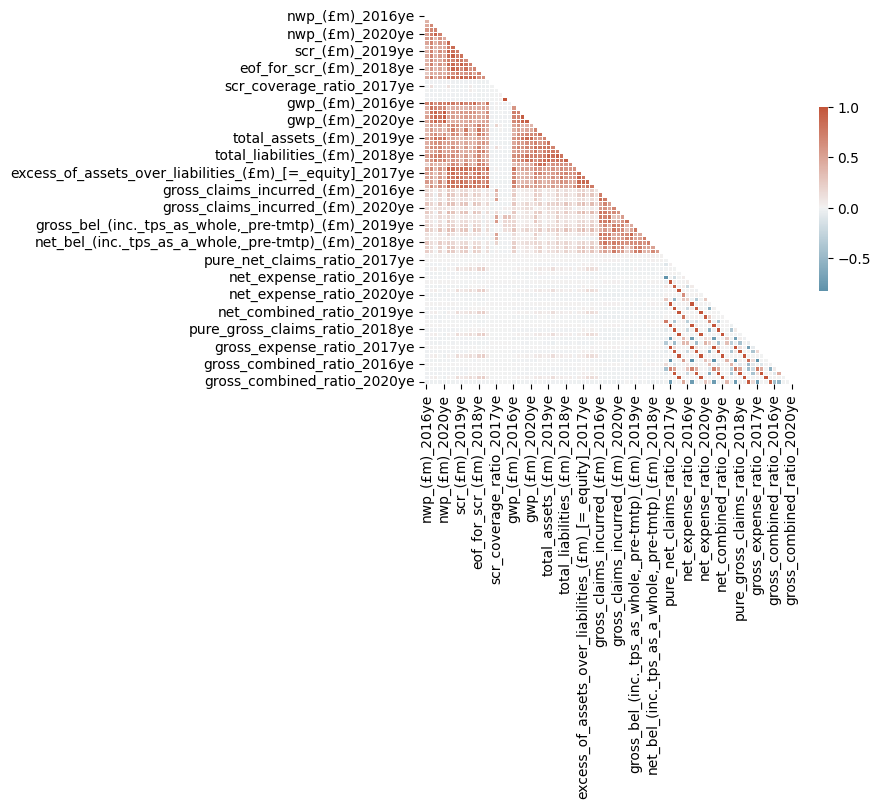

In [21]:
# Correlation matrix
matrix = df_for_matrix.corr()

mask = np.triu(np.ones_like(matrix, dtype=bool)) # Mask the upper triangle of the matrix 

cmap = sns.diverging_palette(230, 20, as_cmap=True) # Colour map

sns.heatmap(matrix, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=0.5, cbar_kws={"shrink": 0.5})

plt.show()

We will focus only on a few columns:
- NWP and GWP: to calculate NWP/GWP ratio, which shows how much of the firm's risk is passed onto reinsurers
- SCR coverage ratio: shows if the firm has enough holding capital to meet its prudential capital requirements
- GCI: total amount of claims that the firm is responsible for. (outstanding claims at end of year + claims paid during year)-outstanding claims at beginning of year).
- Net combined ratio:  This is a ratio that can indicate the profitability of a firm. If this is less than 100% it indicates a profit. 



In [22]:

cols_keep = [
    'firm', 
             
    'nwp_(£m)_2016ye', 'nwp_(£m)_2017ye', 'nwp_(£m)_2018ye', 'nwp_(£m)_2019ye', 'nwp_(£m)_2020ye', # Net Written Premium
             
    'scr_coverage_ratio_2016ye', 'scr_coverage_ratio_2017ye', 'scr_coverage_ratio_2018ye', 'scr_coverage_ratio_2019ye', 'scr_coverage_ratio_2020ye', # Solvency Capital Coverage Ratio
        
    'gwp_(£m)_2016ye', 'gwp_(£m)_2017ye', 'gwp_(£m)_2018ye', 'gwp_(£m)_2019ye', 'gwp_(£m)_2020ye', # Gross Written Premium
                          
    'excess_of_assets_over_liabilities_(£m)_[=_equity]_2016ye', # Equity (assets - liabilities)
    'excess_of_assets_over_liabilities_(£m)_[=_equity]_2017ye',
    'excess_of_assets_over_liabilities_(£m)_[=_equity]_2018ye',
    'excess_of_assets_over_liabilities_(£m)_[=_equity]_2019ye',
    'excess_of_assets_over_liabilities_(£m)_[=_equity]_2020ye',
             
    'gross_claims_incurred_(£m)_2016ye', # Gross claims incurred - total amount of claims they are responsible for
    'gross_claims_incurred_(£m)_2017ye',
    'gross_claims_incurred_(£m)_2018ye',
    'gross_claims_incurred_(£m)_2019ye',
    'gross_claims_incurred_(£m)_2020ye',
    
    
    'net_combined_ratio_2016ye', 'net_combined_ratio_2017ye', # Net combined ratio - indicates profitability
    'net_combined_ratio_2018ye', 'net_combined_ratio_2019ye',
    'net_combined_ratio_2020ye'
]


In [23]:
df_all = df_all[cols_keep]

In [24]:
df_all.head(5)

firm  nwp_(£m)_2016ye  nwp_(£m)_2017ye  nwp_(£m)_2018ye  nwp_(£m)_2019ye  \
0  firm_1        -17754.10             0.00             0.00             0.00   
1  firm_2             9.24             0.10            40.81            35.64   
2  firm_3             0.00             0.81            36.62            86.63   
3  firm_4         19677.45         41072.82         20885.51         14719.67   
4  firm_5           128.81            10.41            79.58            79.42   

   nwp_(£m)_2020ye  scr_coverage_ratio_2016ye  scr_coverage_ratio_2017ye  \
0             0.00                       0.16                55887003.06   
1            13.63                       5.65                       3.68   
2            54.74                       1.14                       1.71   
3         49204.47                       0.68                       1.22   
4            61.73                       1.46                       4.96   

   scr_coverage_ratio_2018ye  scr_coverage_ratio_2019ye  \
0                       0.00                       0.00   
1                      10.24                       5.79   
2                       1.22                       1.35   
3                       2.70                       2.03   
4                       3.23                       4.34   

   scr_coverage_ratio_2020ye  gwp_(£m)_2016ye  gwp_(£m)_2017ye  \
0                       0.00            46.77             0.00   
1                       3.17            41.79             6.19   
2                       0.25             0.00            68.11   
3                       1.20         43375.81         23689.62   
4                       1.62            80.18            55.80   

   gwp_(£m)_2018ye  gwp_(£m)_2019ye  gwp_(£m)_2020ye  \
0             0.00             0.00             0.00   
1            11.58             3.89            16.72   
2           138.08           148.59            38.12   
3         68276.76         41081.45         37761.88   
4            55.47            18.00            32.28   

   excess_of_assets_over_liabilities_(£m)_[=_equity]_2016ye  \
0                                            1243.92          
1                                               8.76          
2                                             210.92          
3                                           24862.17          
4                                             262.68          

   excess_of_assets_over_liabilities_(£m)_[=_equity]_2017ye  \
0                                               4.40          
1                                              48.43          
2                                             100.78          
3                                            7191.96          
4                                               7.59          

   excess_of_assets_over_liabilities_(£m)_[=_equity]_2018ye  \
0                                               0.00          
1                                               0.07          
2                                              87.59          
3                                           12910.35          
4                                              96.95          

   excess_of_assets_over_liabilities_(£m)_[=_equity]_2019ye  \
0                                               0.00          
1                                              43.37          
2                                             922.49          
3                                           12586.97          
4                                             104.61          

   excess_of_assets_over_liabilities_(£m)_[=_equity]_2020ye  \
0                                               0.00          
1                                              12.46          
2                                             412.47          
3                                           24127.84          
4                                             103.18          

   gross_claims_incurred_(£m)_2016ye  gross_claims_incurred_(£m)_2017ye  \
0 

# Analysis on the datasets

#### Float types
Let's make sure that all numbers in the dataset are float types

In [26]:
data_type = df_all.dtypes

In [27]:
data_type_df = data_type.to_frame('data_type')

In [28]:
data_type_df

data_type
firm                                                  object
nwp_(£m)_2016ye                                      float64
nwp_(£m)_2017ye                                      float64
nwp_(£m)_2018ye                                      float64
nwp_(£m)_2019ye                                      float64
nwp_(£m)_2020ye                                      float64
scr_coverage_ratio_2016ye                            float64
scr_coverage_ratio_2017ye                            float64
scr_coverage_ratio_2018ye                            float64
scr_coverage_ratio_2019ye                            float64
scr_coverage_ratio_2020ye                            float64
gwp_(£m)_2016ye                                      float64
gwp_(£m)_2017ye                                      float64
gwp_(£m)_2018ye                                      float64
gwp_(£m)_2019ye                                      float64
gwp_(£m)_2020ye                                      float64
excess_of_assets_over_liabilities_(£m)_[=_equit...   float64
excess_of_assets_over_liabilities_(£m)_[=_equit...   float64
excess_of_assets_over_liabilities_(£m)_[=_equit...   float64
excess_of_assets_over_liabilities_(£m)_[=_equit...   float64
excess_of_assets_over_liabilities_(£m)_[=_equit...   float64
gross_claims_incurred_(£m)_2016ye                    float64
gross_claims_incurred_(£m)_2017ye                    float64
gross_claims_incurred_(£m)_2018ye                    float64
gross_claims_incurred_(£m)_2019ye                    float64
gross_claims_incurred_(£m)_2020ye                    float64
net_combined_ratio_2016ye                            float64
net_combined_ratio_2017ye                            float64
net_combined_ratio_2018ye                            float64
net_combined_ratio_2019ye                            float64
net_combined_ratio_2020ye                            float64

In [29]:
data_type_df[data_type_df['data_type'] != "float64"]

data_type
firm    object

All columns apart from "firm" are type float64. This means all our columns that we are interested is of the correct data type (float64)

#### Null values
Replace the 0s with NaNs

In [30]:
df_all = df_all.replace(0, np.nan)
df_all = df_all.replace(0.00, np.nan)
df_all = df_all.replace(0.000, np.nan)
df_all = df_all.replace(0.00000, np.nan)
df_all = df_all.replace(0.000000, np.nan)

In [31]:
df_all

firm  nwp_(£m)_2016ye  nwp_(£m)_2017ye  nwp_(£m)_2018ye  \
0      firm_1        -17754.10              NaN              NaN   
1      firm_2             9.24             0.10            40.81   
2      firm_3              NaN             0.81            36.62   
3      firm_4         19677.45         41072.82         20885.51   
4      firm_5           128.81            10.41            79.58   
5      firm_6          3091.39          3357.93          3215.47   
6      firm_7          3148.48          3307.13           713.85   
7      firm_8              NaN              NaN              NaN   
8      firm_9            15.28            15.18            27.79   
9     firm_10           404.12          3882.09          6640.43   
10    firm_11              NaN              NaN              NaN   
11    firm_12              NaN              NaN              NaN   
12    firm_13             4.21             4.13             5.38   
13    firm_14            29.43            13.91            32.71   
14    firm_15             0.77             5.01            12.11   
15    firm_16              NaN              NaN              NaN   
16    firm_17          5210.94          1146.93          1620.22   
17    firm_18              NaN              NaN              NaN   
18    firm_19              NaN              NaN              NaN   
19    firm_20              NaN             0.01              NaN   
20    firm_21              NaN              NaN              NaN   
21    firm_22            11.35            26.61            55.84   
22    firm_23           982.26           634.61          2043.25   
23    firm_24              NaN           206.31           897.38   
24    firm_25          9622.28          2356.63          1227.71   
25    firm_26         75526.67          2187.59         11251.35   
26    firm_27             0.02              NaN              NaN   
27    firm_28             0.36            10.57            16.36   
28    firm_29              NaN              NaN              NaN   
29    firm_30           198.46          5260.73          9063.12   
30    firm_31              NaN              NaN              NaN   
31    firm_32            68.51           322.42           346.83   
32    firm_33            -4.39            12.13             6.13   
33    firm_34         10135.26          3630.29          3530.84   
34    firm_35           281.81           168.54           260.78   
35    firm_36              NaN              NaN              NaN   
36    firm_37              NaN              NaN              NaN   
37    firm_38          6060.19          3345.29          1666.57   
38    firm_39            13.76            10.19            15.64   
39    firm_40           166.56           950.80           392.34   
40    firm_41             8.51             8.61             2.80   
41    firm_42              NaN             4.84            25.74   
42    firm_43              NaN              NaN              NaN   
43    firm_44            27.31             0.23             9.13   
44    firm_45             7.26            53.66            73.45   
45    firm_46             1.14             1.03             4.89   
46    firm_47              NaN           327.83           118.62   
47    firm_48             3.60            81.40           218.38   
48    firm_49             0.73             3.62             4.05   
49    firm_50              NaN              NaN              NaN   
50    firm_51              NaN           427.49          3812.03   
51    firm_52              NaN            16.70             5.86   
52    firm_53            10.99           437.28           129.13   
53    firm_54           126.29           348.99           390.90   
54    firm_55             1.70          -125.21            -5.16   
55    firm_56            -0.05              NaN              NaN   
56    firm_57            17.35            16.58            32.54   
57    firm_58              NaN              NaN              NaN 

In [33]:
# Let's count how many firms have null values

null_vals = df_all.isna().sum(axis=1)
null_vals

0      22
1       4
2      12
3       0
4       0
5       0
6      10
7      23
8       2
9       0
10     20
11     10
12     10
13      0
14     10
15     24
16      4
17     12
18     10
19     17
20      9
21      0
22     10
23     10
24      4
25      0
26     20
27      4
28     20
29      7
30     15
31     10
32      2
33      2
34      0
35     14
36      6
37      8
38      6
39      0
40      0
41      4
42     20
43      4
44     10
45      5
46      6
47     10
48      0
49     20
50      8
51      2
52      0
53     14
54      5
55      8
56     10
57     12
58      0
59     12
60      4
61     14
62      4
63      9
64     26
65     18
66     26
67     22
68      6
69      6
70     22
71      0
72      4
73      0
74      0
75      7
76     10
77     10
78     16
79      0
80      0
81     10
82     15
83     18
84     10
85      0
86      2
87      6
88      4
89     24
90     10
91      4
92     10
93     10
94     21
95     18
96      0
97     26
98      4
99      0


In [34]:
firms_null = df_all['firm']

null_count = df_all.isna().sum(axis=1)

In [35]:
firms_null = firms_null.to_frame('firm')

In [37]:
null_count = null_count.to_frame('null_count')

In [38]:
all_null = firms_null.merge(null_count, left_index=True, right_index=True)

In [39]:
len(all_null)

325

In [40]:
# See what percentage of columns is null for each firm
all_null['col_null_percentage'] = all_null['null_count'].apply(lambda x: round(((x/36)*100),2))

In [41]:
len(df_all.columns)

31

In [99]:
all_null.sort_values(by='col_null_percentage', ascending=False).head(10)

firm  null_count  col_null_percentage
309  firm_310          30                83.33
118  firm_119          30                83.33
175  firm_176          30                83.33
127  firm_128          30                83.33
256  firm_257          26                72.22
139  firm_140          26                72.22
66    firm_67          26                72.22
152  firm_153          26                72.22
64    firm_65          26                72.22
97    firm_98          26                72.22

/var/folders/0k/g6vhmrs974937h1lwrj16q5c0000gn/T/ipykernel_7328/3773324590.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(all_null['col_null_percentage'])


<Axes: xlabel='col_null_percentage', ylabel='Density'>

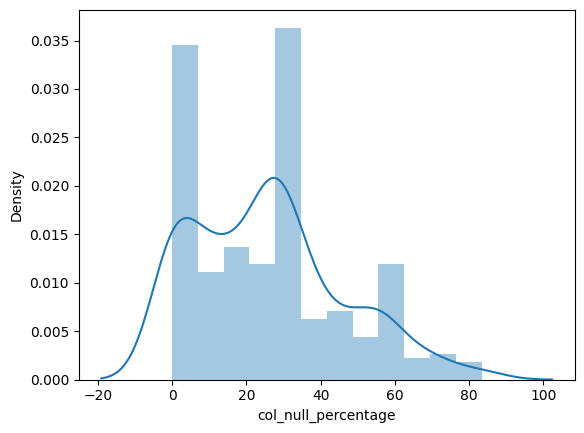

In [43]:
sns.distplot(all_null['col_null_percentage'])

In [44]:
no_nulls = all_null[all_null['col_null_percentage'] == 0.00]

In [45]:
len(no_nulls)

57

In [46]:
nulls_70 = all_null[all_null['col_null_percentage'] >= 70.00]

In [47]:
len(nulls_70)

10

Only 57 (17.5%) rows have no null values. If we were to do analysis on only the firms with a complete dataset and removing the ones that don't, we may be removing too much valuable information. 

Therefore, I decided to 
- remove rows where the majority of values are nulls (over 70%). There were 21 rows where this was the case.
- use KNN imputation on the remaining null values, which is machine learning algorithm that imputes missing values based on the K nearest neighbours of the datapoint.

In [48]:
remove_rows = list(nulls_70['firm'])
remove_rows

['firm_65',
 'firm_67',
 'firm_98',
 'firm_119',
 'firm_128',
 'firm_140',
 'firm_153',
 'firm_176',
 'firm_257',
 'firm_310']

In [49]:
df_all = df_all[~df_all['firm'].isin(remove_rows)]

In [119]:
df_all.tail(10)

firm  nwp_(£m)_2016ye  nwp_(£m)_2017ye  nwp_(£m)_2018ye  \
315  firm_316              NaN            -0.11          -368.82   
316  firm_317          1635.74          4105.05          4838.90   
317  firm_318           102.02            74.83            83.87   
318  firm_319              NaN              NaN              NaN   
319  firm_320              NaN              NaN              NaN   
320  firm_321              NaN              NaN            -0.17   
321  firm_322          3315.47          4136.48          2192.75   
322  firm_323              NaN              NaN              NaN   
323  firm_324            29.81            21.00            13.55   
324  firm_325           108.47           496.30           437.22   

     nwp_(£m)_2019ye  nwp_(£m)_2020ye  scr_coverage_ratio_2016ye  \
315             0.02            -0.02                       2.02   
316          4451.74          3479.29                       0.57   
317           310.07              NaN                       2.20   
318              NaN              NaN                      68.40   
319              NaN              NaN                 6735557.78   
320            -6.81            31.26                        NaN   
321          2252.92          2780.63                       2.36   
322              NaN              NaN                       2.06   
323             6.15            49.79                       2.30   
324           120.65              NaN                       2.53   

     scr_coverage_ratio_2017ye  scr_coverage_ratio_2018ye  \
315                       0.76                       2.44   
316                       2.00                       0.84   
317                       0.33                       0.60   
318                      21.65                      31.72   
319                       1.55                       1.70   
320                      24.64                       2.82   
321                       0.97                       2.22   
322                       5.30                      22.54   
323                       0.45                        NaN   
324                       1.71                       2.18   

     scr_coverage_ratio_2019ye  scr_coverage_ratio_2020ye  gwp_(£m)_2016ye  \
315                       3.56                       3.05              NaN   
316                       1.61                       1.31          2476.65   
317                       2.17                        NaN           609.64   
318                      32.71                        NaN              NaN   
319                       2.33                       0.48              NaN   
320                       0.03                       3.35              NaN   
321                       0.29                       2.62           337.06   
322                      67.28                       0.61              NaN   
323                       0.06                       0.90            41.74   
324                       0.75                        NaN           416.84   

     gwp_(£m)_2017ye  gwp_(£m)_2018ye  gwp_(£m)_2019ye  gwp_(£m)_2020ye  \
315            -0.03            29.67             0.25            -0.26   
316          2105.03          2833.77           234.70          3716.10   
317            65.47           840.65          1615.59              NaN   
318              NaN              NaN              NaN              NaN   
319              NaN              NaN              NaN              NaN   
320              NaN             8.82             2.90            67.34   
321          2472.33          2287.80          1979.54          1129.66   
322              NaN              NaN              NaN              NaN   
323            39.95           149.48           223.88            51.87   
324           268.85           798.84           314.51              NaN   

     excess_of_assets_over_liabilities_(£m)_[=_equity]_2016ye  \
315                                             234.21          
316                     

In [76]:
df_all.columns

Index(['firm', 'nwp_(£m)_2016ye', 'nwp_(£m)_2017ye', 'nwp_(£m)_2018ye',
       'nwp_(£m)_2019ye', 'nwp_(£m)_2020ye', 'scr_coverage_ratio_2016ye',
       'scr_coverage_ratio_2017ye', 'scr_coverage_ratio_2018ye',
       'scr_coverage_ratio_2019ye', 'scr_coverage_ratio_2020ye',
       'gwp_(£m)_2016ye', 'gwp_(£m)_2017ye', 'gwp_(£m)_2018ye',
       'gwp_(£m)_2019ye', 'gwp_(£m)_2020ye',
       'excess_of_assets_over_liabilities_(£m)_[=_equity]_2016ye',
       'excess_of_assets_over_liabilities_(£m)_[=_equity]_2017ye',
       'excess_of_assets_over_liabilities_(£m)_[=_equity]_2018ye',
       'excess_of_assets_over_liabilities_(£m)_[=_equity]_2019ye',
       'excess_of_assets_over_liabilities_(£m)_[=_equity]_2020ye',
       'gross_claims_incurred_(£m)_2016ye',
       'gross_claims_incurred_(£m)_2017ye',
       'gross_claims_incurred_(£m)_2018ye',
       'gross_claims_incurred_(£m)_2019ye',
       'gross_claims_incurred_(£m)_2020ye', 'net_combined_ratio_2016ye',
       'net_combined_ratio_2017

In [52]:
# Let's see how many columns have null values
null_count_cols = df_all.isna().sum(axis=0)

null_count_cols = null_count_cols.to_frame('null_count')

In [53]:
null_count_cols = null_count_cols.drop("firm", axis=0)

In [54]:
null_count_cols['null_percentage'] = null_count_cols['null_count'].apply(lambda x: round((x/(len(df_all))*100),2))

In [55]:
null_count_cols.sort_values(by='null_percentage', ascending=False)

null_count  \
net_combined_ratio_2020ye                                  146   
net_combined_ratio_2019ye                                  140   
net_combined_ratio_2016ye                                  139   
net_combined_ratio_2018ye                                  130   
nwp_(£m)_2020ye                                            129   
gwp_(£m)_2020ye                                            128   
gross_claims_incurred_(£m)_2020ye                          128   
net_combined_ratio_2017ye                                  124   
gross_claims_incurred_(£m)_2019ye                          120   
gross_claims_incurred_(£m)_2016ye                          116   
nwp_(£m)_2016ye                                            114   
nwp_(£m)_2019ye                                            108   
gross_claims_incurred_(£m)_2018ye                          108   
gwp_(£m)_2016ye                                            104   
gwp_(£m)_2019ye                                            101   
gross_claims_incurred_(£m)_2017ye                          101   
nwp_(£m)_2018ye                                             96   
gwp_(£m)_2018ye                                             86   
nwp_(£m)_2017ye                                             86   
scr_coverage_ratio_2020ye                                   84   
gwp_(£m)_2017ye                                             83   
excess_of_assets_over_liabilities_(£m)_[=_equit...          83   
scr_coverage_ratio_2019ye                                   54   
excess_of_assets_over_liabilities_(£m)_[=_equit...          51   
scr_coverage_ratio_2018ye                                   38   
excess_of_assets_over_liabilities_(£m)_[=_equit...          35   
scr_coverage_ratio_2016ye                                   25   
excess_of_assets_over_liabilities_(£m)_[=_equit...          24   
scr_coverage_ratio_2017ye                                   23   
excess_of_assets_over_liabilities_(£m)_[=_equit...          22   

                                                    null_percentage  
net_combined_ratio_2020ye                                     46.35  
net_combined_ratio_2019ye                                     44.44  
net_combined_ratio_2016ye                                     44.13  
net_combined_ratio_2018ye                                     41.27  
nwp_(£m)_2020ye                                               40.95  
gwp_(£m)_2020ye                                               40.63  
gross_claims_incurred_(£m)_2020ye                             40.63  
net_combined_ratio_2017ye                                     39.37  
gross_claims_incurred_(£m)_2019ye                             38.10  
gross_claims_incurred_(£m)_2016ye                             36.83  
nwp_(£m)_2016ye                                               36.19  
nwp_(£m)_2019ye                                               34.29  
gross_claims_incurred_(£m)_2018ye                             34.29  
gwp_(£m)_2016ye                                               33.02  
gwp_(£m)_2019ye                                               32.06  
gross_claims_incurred_(£m)_2017ye                             32.06  
nwp_(£m)_2018ye                                               30.48  
gwp_(£m)_2018ye                                               27.30  
nwp_(£m)_2017ye                                               27.30  
scr_coverage_ratio_2020ye                                     26.67  
gwp_(£m)_2017ye                                               26.35  
excess_of_assets_over_liabilities_(£m)_[=_equit...            26.35  
scr_coverage_ratio_2019ye                                     17.14  
excess_of_assets_over_liabilities_(£m)_[=_equit...            16.19  
scr_coverage_ratio_2018ye                                     12.06  
excess_of_assets_over_liabilities_(£m)_[=_equit...            11.11  
scr_coverage_ratio_2016ye                                      7.94  
excess_of_assets_over_liabilities_(£m)_[=_equ

Many of columns with the most missing values are from the year 2020, when the pandemic hit, which most likely impacted reporting

## Statistical metrics

In [78]:
df_all.columns

Index(['firm', 'nwp_(£m)_2016ye', 'nwp_(£m)_2017ye', 'nwp_(£m)_2018ye',
       'nwp_(£m)_2019ye', 'nwp_(£m)_2020ye', 'scr_coverage_ratio_2016ye',
       'scr_coverage_ratio_2017ye', 'scr_coverage_ratio_2018ye',
       'scr_coverage_ratio_2019ye', 'scr_coverage_ratio_2020ye',
       'gwp_(£m)_2016ye', 'gwp_(£m)_2017ye', 'gwp_(£m)_2018ye',
       'gwp_(£m)_2019ye', 'gwp_(£m)_2020ye',
       'excess_of_assets_over_liabilities_(£m)_[=_equity]_2016ye',
       'excess_of_assets_over_liabilities_(£m)_[=_equity]_2017ye',
       'excess_of_assets_over_liabilities_(£m)_[=_equity]_2018ye',
       'excess_of_assets_over_liabilities_(£m)_[=_equity]_2019ye',
       'excess_of_assets_over_liabilities_(£m)_[=_equity]_2020ye',
       'gross_claims_incurred_(£m)_2016ye',
       'gross_claims_incurred_(£m)_2017ye',
       'gross_claims_incurred_(£m)_2018ye',
       'gross_claims_incurred_(£m)_2019ye',
       'gross_claims_incurred_(£m)_2020ye', 'net_combined_ratio_2016ye',
       'net_combined_ratio_2017

In [79]:
df_all.describe()

nwp_(£m)_2016ye  nwp_(£m)_2017ye  nwp_(£m)_2018ye  nwp_(£m)_2019ye  \
count       201.000000       229.000000       219.000000       207.000000   
mean       1209.813234      1070.217729      1090.656027       999.069662   
std        6789.618040      4029.183815      3866.865413      3161.279040   
min      -17754.100000     -2061.020000      -368.820000      -184.090000   
25%           4.210000         5.010000         6.125000         5.850000   
50%          32.360000        40.950000        47.990000        40.720000   
75%         198.560000       348.990000       339.080000       273.635000   
max       75526.670000     41072.820000     41591.400000     25473.310000   

       nwp_(£m)_2020ye  scr_coverage_ratio_2016ye  scr_coverage_ratio_2017ye  \
count       186.000000               2.900000e+02               2.920000e+02   
mean       1370.801183               2.322955e+04               6.789042e+06   
std        6080.682687               3.955254e+05               7.968083e+07   
min       -2054.550000              -3.490000e+00              -9.800000e-01   
25%           3.635000               7.625000e-01               7.600000e-01   
50%          34.415000               1.925000e+00               1.770000e+00   
75%         352.165000               3.092500e+00               3.565000e+00   
max       60699.950000               6.735558e+06               9.993029e+08   

       scr_coverage_ratio_2018ye  scr_coverage_ratio_2019ye  \
count               2.770000e+02                 261.000000   
mean                2.646839e+04                 328.211494   
std                 4.304047e+05                5232.536543   
min                -8.500000e-01                  -1.190000   
25%                 1.100000e+00                   1.190000   
50%                 2.130000e+00                   2.100000   
75%                 3.490000e+00                   3.540000   
max                 7.161992e+06               84538.370000   

       scr_coverage_ratio_2020ye  gwp_(£m)_2016ye  gwp_(£m)_2017ye  \
count                 231.000000       211.000000       232.000000   
mean                  390.976190      1139.048768      1229.217629   
std                  5890.371374      4260.377302      4334.252535   
min                    -0.720000       -19.780000        -2.210000   
25%                     0.900000         6.925000         9.300000   
50%                     1.980000        54.720000        70.405000   
75%                     3.540000       380.445000       455.367500   
max                 89529.280000     43375.810000     43569.200000   

       gwp_(£m)_2018ye  gwp_(£m)_2019ye  gwp_(£m)_2020ye  \
count       229.000000       214.000000       187.000000   
mean       1600.712096      1542.419346      1602.581176   
std        7086.257644      6353.009946      6467.755719   
min          -6.200000        -0.060000        -8.430000   
25%           8.820000         8.277500        12.995000   
50%          75.180000        76.460000        60.990000   
75%         476.830000       409.130000       505.610000   
max       74078.640000     72456.770000     69697.930000   

       excess_of_assets_over_liabilities_(£m)_[=_equity]_2016ye  \
count                                         291.000000          
mean                                          685.690584          
std                                          2659.390510          
min                                           -64.390000          
25%                                            10.085000          
50%                                            43.530000          
75%                                           232.530000          
max                                         24862.170000          

       excess_of_assets_over_liabilities_(£m)_[=_equity]_2017ye  \
count                                         293.000000          
mean                                          583.526758          
std                                          22

## Dealing with NaN values
To deal with NaN values, I will use KNN Imputation

In [57]:
df_all

firm  nwp_(£m)_2016ye  nwp_(£m)_2017ye  nwp_(£m)_2018ye  \
0      firm_1        -17754.10              NaN              NaN   
1      firm_2             9.24             0.10            40.81   
2      firm_3              NaN             0.81            36.62   
3      firm_4         19677.45         41072.82         20885.51   
4      firm_5           128.81            10.41            79.58   
5      firm_6          3091.39          3357.93          3215.47   
6      firm_7          3148.48          3307.13           713.85   
7      firm_8              NaN              NaN              NaN   
8      firm_9            15.28            15.18            27.79   
9     firm_10           404.12          3882.09          6640.43   
10    firm_11              NaN              NaN              NaN   
11    firm_12              NaN              NaN              NaN   
12    firm_13             4.21             4.13             5.38   
13    firm_14            29.43            13.91            32.71   
14    firm_15             0.77             5.01            12.11   
15    firm_16              NaN              NaN              NaN   
16    firm_17          5210.94          1146.93          1620.22   
17    firm_18              NaN              NaN              NaN   
18    firm_19              NaN              NaN              NaN   
19    firm_20              NaN             0.01              NaN   
20    firm_21              NaN              NaN              NaN   
21    firm_22            11.35            26.61            55.84   
22    firm_23           982.26           634.61          2043.25   
23    firm_24              NaN           206.31           897.38   
24    firm_25          9622.28          2356.63          1227.71   
25    firm_26         75526.67          2187.59         11251.35   
26    firm_27             0.02              NaN              NaN   
27    firm_28             0.36            10.57            16.36   
28    firm_29              NaN              NaN              NaN   
29    firm_30           198.46          5260.73          9063.12   
30    firm_31              NaN              NaN              NaN   
31    firm_32            68.51           322.42           346.83   
32    firm_33            -4.39            12.13             6.13   
33    firm_34         10135.26          3630.29          3530.84   
34    firm_35           281.81           168.54           260.78   
35    firm_36              NaN              NaN              NaN   
36    firm_37              NaN              NaN              NaN   
37    firm_38          6060.19          3345.29          1666.57   
38    firm_39            13.76            10.19            15.64   
39    firm_40           166.56           950.80           392.34   
40    firm_41             8.51             8.61             2.80   
41    firm_42              NaN             4.84            25.74   
42    firm_43              NaN              NaN              NaN   
43    firm_44            27.31             0.23             9.13   
44    firm_45             7.26            53.66            73.45   
45    firm_46             1.14             1.03             4.89   
46    firm_47              NaN           327.83           118.62   
47    firm_48             3.60            81.40           218.38   
48    firm_49             0.73             3.62             4.05   
49    firm_50              NaN              NaN              NaN   
50    firm_51              NaN           427.49          3812.03   
51    firm_52              NaN            16.70             5.86   
52    firm_53            10.99           437.28           129.13   
53    firm_54           126.29           348.99           390.90   
54    firm_55             1.70          -125.21            -5.16   
55    firm_56            -0.05              NaN              NaN   
56    firm_57            17.35            16.58            32.54   
57    firm_58              NaN              NaN              NaN 

In [81]:
cols_null_fill = list(df_all.columns)

In [82]:
cols_null_fill.remove('firm')

In [83]:
cols_null_fill

['nwp_(£m)_2016ye',
 'nwp_(£m)_2017ye',
 'nwp_(£m)_2018ye',
 'nwp_(£m)_2019ye',
 'nwp_(£m)_2020ye',
 'scr_coverage_ratio_2016ye',
 'scr_coverage_ratio_2017ye',
 'scr_coverage_ratio_2018ye',
 'scr_coverage_ratio_2019ye',
 'scr_coverage_ratio_2020ye',
 'gwp_(£m)_2016ye',
 'gwp_(£m)_2017ye',
 'gwp_(£m)_2018ye',
 'gwp_(£m)_2019ye',
 'gwp_(£m)_2020ye',
 'excess_of_assets_over_liabilities_(£m)_[=_equity]_2016ye',
 'excess_of_assets_over_liabilities_(£m)_[=_equity]_2017ye',
 'excess_of_assets_over_liabilities_(£m)_[=_equity]_2018ye',
 'excess_of_assets_over_liabilities_(£m)_[=_equity]_2019ye',
 'excess_of_assets_over_liabilities_(£m)_[=_equity]_2020ye',
 'gross_claims_incurred_(£m)_2016ye',
 'gross_claims_incurred_(£m)_2017ye',
 'gross_claims_incurred_(£m)_2018ye',
 'gross_claims_incurred_(£m)_2019ye',
 'gross_claims_incurred_(£m)_2020ye',
 'net_combined_ratio_2016ye',
 'net_combined_ratio_2017ye',
 'net_combined_ratio_2018ye',
 'net_combined_ratio_2019ye',
 'net_combined_ratio_2020ye']

In [110]:
# Scale the data before imputation
df_all_copy = df_all.copy()
df_all_copy_nofirm = df_all_copy.drop('firm', axis=1)

scaler = MinMaxScaler()
df_all_copy_nofirm_scaled = pd.DataFrame(scaler.fit_transform(df_all_copy_nofirm), columns=df_all_copy_nofirm.columns) # Use scaler

In [116]:
df_filled_no_firm_imputed = imputer.fit_transform(df_all_copy_nofirm_scaled) # Use KNN imputer
df_filled_scaled = pd.DataFrame(df_filled_no_firm_imputed, columns=df_all_copy_nofirm.columns, index=df_all_copy_nofirm.index) # Convert to dataframe

In [232]:
# Scale back to original values 
df_filled = pd.DataFrame(scaler.inverse_transform(df_filled_scaled), columns=df_filled_scaled.columns, index=df_all_copy_nofirm.index)

In [333]:
df_filled.head()

nwp_(£m)_2016ye  nwp_(£m)_2017ye  nwp_(£m)_2018ye  nwp_(£m)_2019ye  \
0        -17754.10          155.212          126.674           85.686   
1             9.24            0.100           40.810           35.640   
2             1.12            0.810           36.620           86.630   
3         19677.45        41072.820        20885.510        14719.670   
4           128.81           10.410           79.580           79.420   

   nwp_(£m)_2020ye  scr_coverage_ratio_2016ye  scr_coverage_ratio_2017ye  \
0           45.866                       0.16                55887003.06   
1           13.630                       5.65                       3.68   
2           54.740                       1.14                       1.71   
3        49204.470                       0.68                       1.22   
4           61.730                       1.46                       4.96   

   scr_coverage_ratio_2018ye  scr_coverage_ratio_2019ye  \
0                     11.344                      2.254   
1                     10.240                      5.790   
2                      1.220                      1.350   
3                      2.700                      2.030   
4                      3.230                      4.340   

   scr_coverage_ratio_2020ye  gwp_(£m)_2016ye  gwp_(£m)_2017ye  \
0                      5.406           46.770          154.218   
1                      3.170           41.790            6.190   
2                      0.250           60.104           68.110   
3                      1.200        43375.810        23689.620   
4                      1.620           80.180           55.800   

   gwp_(£m)_2018ye  gwp_(£m)_2019ye  gwp_(£m)_2020ye  \
0          106.316            54.51          265.128   
1           11.580             3.89           16.720   
2          138.080           148.59           38.120   
3        68276.760         41081.45        37761.880   
4           55.470            18.00           32.280   

   excess_of_assets_over_liabilities_(£m)_[=_equity]_2016ye  \
0                                            1243.92          
1                                               8.76          
2                                             210.92          
3                                           24862.17          
4                                             262.68          

   excess_of_assets_over_liabilities_(£m)_[=_equity]_2017ye  \
0                                               4.40          
1                                              48.43          
2                                             100.78          
3                                            7191.96          
4                                               7.59          

   excess_of_assets_over_liabilities_(£m)_[=_equity]_2018ye  \
0                                              39.27          
1                                               0.07          
2                                              87.59          
3                                           12910.35          
4                                              96.95          

   excess_of_assets_over_liabilities_(£m)_[=_equity]_2019ye  \
0                                            115.084          
1                                             43.370          
2                                            922.490          
3                                          12586.970          
4                                            104.610          

   excess_of_assets_over_liabilities_(£m)_[=_equity]_2020ye  \
0                                             206.29          
1                                              12.46          
2                                             412.47          
3                                           24127.84          
4                                             103.18          

   gross_claims_incurred_(£m)_2016ye  gross_claims_incurred_(£m)_2017ye  \
0                           2.648724            

In [334]:
df_filled.isna().sum()

nwp_(£m)_2016ye                                             0
nwp_(£m)_2017ye                                             0
nwp_(£m)_2018ye                                             0
nwp_(£m)_2019ye                                             0
nwp_(£m)_2020ye                                             0
scr_coverage_ratio_2016ye                                   0
scr_coverage_ratio_2017ye                                   0
scr_coverage_ratio_2018ye                                   0
scr_coverage_ratio_2019ye                                   0
scr_coverage_ratio_2020ye                                   0
gwp_(£m)_2016ye                                             0
gwp_(£m)_2017ye                                             0
gwp_(£m)_2018ye                                             0
gwp_(£m)_2019ye                                             0
gwp_(£m)_2020ye                                             0
excess_of_assets_over_liabilities_(£m)_[=_equity]_2016ye    0
excess_o

In [237]:
# Let's see the stats metrics for this new filled in df
df_filled.describe()

nwp_(£m)_2016ye  nwp_(£m)_2017ye  nwp_(£m)_2018ye  nwp_(£m)_2019ye  \
count       315.000000       315.000000       315.000000       315.000000   
mean        745.900248       815.103435       819.108933       716.359746   
std        5472.992132      3463.607723      3267.137005      2598.823589   
min      -17754.100000     -2061.020000      -368.820000      -184.090000   
25%           6.163000         5.446000         6.581000         7.198000   
50%          25.232000        35.330000        44.270000        29.890000   
75%         127.375000       245.394000       213.195000       234.175000   
max       75526.670000     41072.820000     41591.400000     25473.310000   

       nwp_(£m)_2020ye  scr_coverage_ratio_2016ye  scr_coverage_ratio_2017ye  \
count       315.000000               3.150000e+02               3.150000e+02   
mean        891.228984               2.993927e+04               7.668741e+06   
std        4712.680827               3.938817e+05               7.825253e+07   
min       -2054.550000              -3.490000e+00              -9.800000e-01   
25%           5.828000               8.800000e-01               8.650000e-01   
50%          34.670000               1.990000e+00               1.900000e+00   
75%         172.345000               3.411000e+00               3.675000e+00   
max       60699.950000               6.735558e+06               9.993029e+08   

       scr_coverage_ratio_2018ye  scr_coverage_ratio_2019ye  \
count               3.150000e+02                 315.000000   
mean                2.338297e+04                 326.438508   
std                 4.036122e+05                4854.298749   
min                -8.500000e-01                  -1.190000   
25%                 1.290000e+00                   1.335000   
50%                 2.320000e+00                   2.254000   
75%                 3.956000e+00                   3.704000   
max                 7.161992e+06               84538.370000   

       scr_coverage_ratio_2020ye  gwp_(£m)_2016ye  gwp_(£m)_2017ye  \
count                 315.000000       315.000000       315.000000   
mean                  345.060984       804.767041       934.821517   
std                  5140.896315      3519.847112      3752.810193   
min                    -0.720000       -19.780000        -2.210000   
25%                     1.180000         8.932000         6.610000   
50%                     2.500000        47.750000        42.400000   
75%                     4.400000       267.834000       288.021000   
max                 89529.280000     43375.810000     43569.200000   

       gwp_(£m)_2018ye  gwp_(£m)_2019ye  gwp_(£m)_2020ye  \
count       315.000000       315.000000       315.000000   
mean       1233.201346      1120.187835      1055.016781   
std        6077.478569      5276.137233      5034.324837   
min          -6.200000        -0.060000        -8.430000   
25%           8.515000         8.667000        12.072000   
50%          50.620000        53.970000        46.850000   
75%         365.700000       308.040000       340.559000   
max       74078.640000     72456.770000     69697.930000   

       excess_of_assets_over_liabilities_(£m)_[=_equity]_2016ye  \
count                                         315.000000          
mean                                          647.070108          
std                                          2559.812500          
min                                           -64.390000          
25%                                            10.925000          
50%                                            51.910000          
75%                                           232.530000          
max                                         24862.170000          

       excess_of_assets_over_liabilities_(£m)_[=_equity]_2017ye  \
count                                         315.000000          
mean                                          552.576641          
std                                          21

In [238]:
df_filled_with_firm = df_filled.merge(firms_null, left_index=True, right_index=True, how='left')

## Distribution of all columns


<Axes: ylabel='Density'>

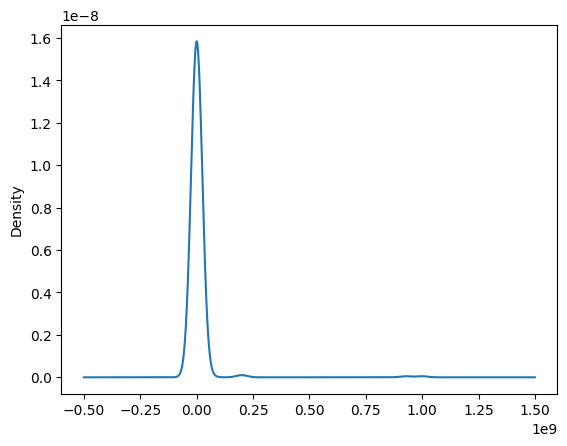

In [240]:
df_filled['scr_coverage_ratio_2017ye'].plot(kind='kde')

The distribution for this column looks skewed and not a normal distribution. I will conduct the Shapiro - Wilk test 

In [241]:
__, pval = shapiro(df_filled['scr_coverage_ratio_2017ye'])

In [242]:
pval

2.2877778991601414e-36

In [243]:
res = stats.shapiro(df_filled['scr_coverage_ratio_2017ye'])
res.statistic

0.07278329133987427

In [244]:
shap_wilk_dict = []
col = list(df_filled.columns)

for i in col:
    __, pval = shapiro(df_filled[i])    
    dict = {'col_name': i, 'pval': pval}
    shap_wilk_dict.append(dict)
    

In [245]:
shap_wilk_dict

[{'col_name': 'nwp_(£m)_2016ye', 'pval': 9.222897682071714e-35},
 {'col_name': 'nwp_(£m)_2017ye', 'pval': 8.84247717484315e-34},
 {'col_name': 'nwp_(£m)_2018ye', 'pval': 1.37244392936325e-33},
 {'col_name': 'nwp_(£m)_2019ye', 'pval': 5.039939008648266e-33},
 {'col_name': 'nwp_(£m)_2020ye', 'pval': 6.874227252733278e-35},
 {'col_name': 'scr_coverage_ratio_2016ye', 'pval': 1.1046666728259454e-36},
 {'col_name': 'scr_coverage_ratio_2017ye', 'pval': 2.2877778991601414e-36},
 {'col_name': 'scr_coverage_ratio_2018ye', 'pval': 6.370184437126352e-37},
 {'col_name': 'scr_coverage_ratio_2019ye', 'pval': 8.314797480947747e-37},
 {'col_name': 'scr_coverage_ratio_2020ye', 'pval': 8.28193938614075e-37},
 {'col_name': 'gwp_(£m)_2016ye', 'pval': 3.602395880712241e-34},
 {'col_name': 'gwp_(£m)_2017ye', 'pval': 1.0854529529172388e-33},
 {'col_name': 'gwp_(£m)_2018ye', 'pval': 9.045341785856152e-35},
 {'col_name': 'gwp_(£m)_2019ye', 'pval': 1.586024502998692e-34},
 {'col_name': 'gwp_(£m)_2020ye', 'pval':

In [246]:
# Convert dict to df 
shap_wilk_df = pd.DataFrame(shap_wilk_dict)

In [247]:
shap_wilk_df

col_name          pval
0                                     nwp_(£m)_2016ye  9.222898e-35
1                                     nwp_(£m)_2017ye  8.842477e-34
2                                     nwp_(£m)_2018ye  1.372444e-33
3                                     nwp_(£m)_2019ye  5.039939e-33
4                                     nwp_(£m)_2020ye  6.874227e-35
5                           scr_coverage_ratio_2016ye  1.104667e-36
6                           scr_coverage_ratio_2017ye  2.287778e-36
7                           scr_coverage_ratio_2018ye  6.370184e-37
8                           scr_coverage_ratio_2019ye  8.314797e-37
9                           scr_coverage_ratio_2020ye  8.281939e-37
10                                    gwp_(£m)_2016ye  3.602396e-34
11                                    gwp_(£m)_2017ye  1.085453e-33
12                                    gwp_(£m)_2018ye  9.045342e-35
13                                    gwp_(£m)_2019ye  1.586025e-34
14                                    gwp_(£m)_2020ye  1.333842e-34
15  excess_of_assets_over_liabilities_(£m)_[=_equi...  9.826450e-34
16  excess_of_assets_over_liabilities_(£m)_[=_equi...  9.513211e-34
17  excess_of_assets_over_liabilities_(£m)_[=_equi...  7.590147e-33
18  excess_of_assets_over_liabilities_(£m)_[=_equi...  1.937809e-33
19  excess_of_assets_over_liabilities_(£m)_[=_equi...  4.662462e-33
20                  gross_claims_incurred_(£m)_2016ye  3.772385e-33
21                  gross_claims_incurred_(£m)_2017ye  1.273138e-30
22                  gross_claims_incurred_(£m)_2018ye  3.006159e-32
23                  gross_claims_incurred_(£m)_2019ye  3.735335e-29
24                  gross_claims_incurred_(£m)_2020ye  1.067865e-29
25                          net_combined_ratio_2016ye  3.636703e-33
26                          net_combined_ratio_2017ye  1.355774e-36
27                          net_combined_ratio_2018ye  1.327574e-36
28                          net_combined_ratio_2019ye  8.924478e-37
29                          net_combined_ratio_2020ye  2.315525e-34

In [248]:
normal_dist = shap_wilk_df[shap_wilk_df["pval"] >= 0.05]
normal_dist

Empty DataFrame
Columns: [col_name, pval]
Index: []

If thep-value is greater than 0.05, the variable is normally distributed. If it is below 0.05, then it is not normally distributed. None of the p-values are greater than 0.05 which means none of the columns are normally distributed.

## Finding outliers


#### Outliers in whole df

In [249]:
def get_all_outliers(df, col_list):
    """Get all outliers in the dataframe

    Args:
        df: Dataframe of desired column.
        col_list: List of columns 

    Returns:

        A dataframe with all outliers

    """
    outliers_all = pd.DataFrame()
    for col in col_list: 
        outliers_single = get_outliers(df_filled, col)
        col_name = str(col)
        outlier_df_single = outliers_single.to_frame(col_name)
        outliers_all = outliers_all.merge(outlier_df_single, left_index=True, right_index=True, how = 'outer')

    return outliers_all
    

In [250]:
# Function to determine outliers
def get_outliers(df, col):
    """Get outlier values of a column

    Args:
        df: Dataframe of desired column.
        col: Desire column name.

    Returns:
        Series of all outliers in column

    """
    percentile25 = df[col].quantile(0.25)
    percentile75 = df[col].quantile(0.75)
    
    iqr = percentile75 - percentile25
    
    upper_limit = percentile75 + 1.5 * iqr
    lower_limit = percentile25 - 1.5 * iqr

    outliers = df[col][(df[col]<lower_limit) | (df[col]>upper_limit)]

    return outliers
    
    

In [251]:
df_col_list = list(df_filled.columns)
all_outliers_df = get_all_outliers(df_filled, df_col_list)

In [336]:
all_outliers_df.head(5)

nwp_(£m)_2016ye  nwp_(£m)_2017ye  nwp_(£m)_2018ye  nwp_(£m)_2019ye  \
0        -17754.10              NaN              NaN              NaN   
1              NaN              NaN              NaN              NaN   
2              NaN              NaN              NaN              NaN   
3         19677.45         41072.82         20885.51         14719.67   
4              NaN              NaN              NaN              NaN   

   nwp_(£m)_2020ye  scr_coverage_ratio_2016ye  scr_coverage_ratio_2017ye  \
0              NaN                        NaN                55887003.06   
1              NaN                        NaN                        NaN   
2              NaN                        NaN                        NaN   
3         49204.47                        NaN                        NaN   
4              NaN                        NaN                        NaN   

   scr_coverage_ratio_2018ye  scr_coverage_ratio_2019ye  \
0                     11.344                        NaN   
1                     10.240                        NaN   
2                        NaN                        NaN   
3                        NaN                        NaN   
4                        NaN                        NaN   

   scr_coverage_ratio_2020ye  gwp_(£m)_2016ye  gwp_(£m)_2017ye  \
0                        NaN              NaN              NaN   
1                        NaN              NaN              NaN   
2                        NaN              NaN              NaN   
3                        NaN         43375.81         23689.62   
4                        NaN              NaN              NaN   

   gwp_(£m)_2018ye  gwp_(£m)_2019ye  gwp_(£m)_2020ye  \
0              NaN              NaN              NaN   
1              NaN              NaN              NaN   
2              NaN              NaN              NaN   
3         68276.76         41081.45         37761.88   
4              NaN              NaN              NaN   

   excess_of_assets_over_liabilities_(£m)_[=_equity]_2016ye  \
0                                            1243.92          
1                                                NaN          
2                                                NaN          
3                                           24862.17          
4                                                NaN          

   excess_of_assets_over_liabilities_(£m)_[=_equity]_2017ye  \
0                                                NaN          
1                                                NaN          
2                                                NaN          
3                                            7191.96          
4                                                NaN          

   excess_of_assets_over_liabilities_(£m)_[=_equity]_2018ye  \
0                                                NaN          
1                                                NaN          
2                                                NaN          
3                                           12910.35          
4                                                NaN          

   excess_of_assets_over_liabilities_(£m)_[=_equity]_2019ye  \
0                                                NaN          
1                                                NaN          
2                                             922.49          
3                                           12586.97          
4                                                NaN          

   excess_of_assets_over_liabilities_(£m)_[=_equity]_2020ye  \
0                                                NaN          
1                                                NaN          
2                                                NaN          
3                                           24127.84          
4                                                NaN          

   gross_claims_incurred_(£m)_2016ye  gross_claims_incurred_(£m)_2017ye  \
0                                NaN            

In [338]:
len(all_outliers_df)

248

There are 248 rows with outliers. We should not remove every row with an outlier.

### Every column

#### nwp_(£m)_2016e

<Axes: xlabel='nwp_(£m)_2016ye'>

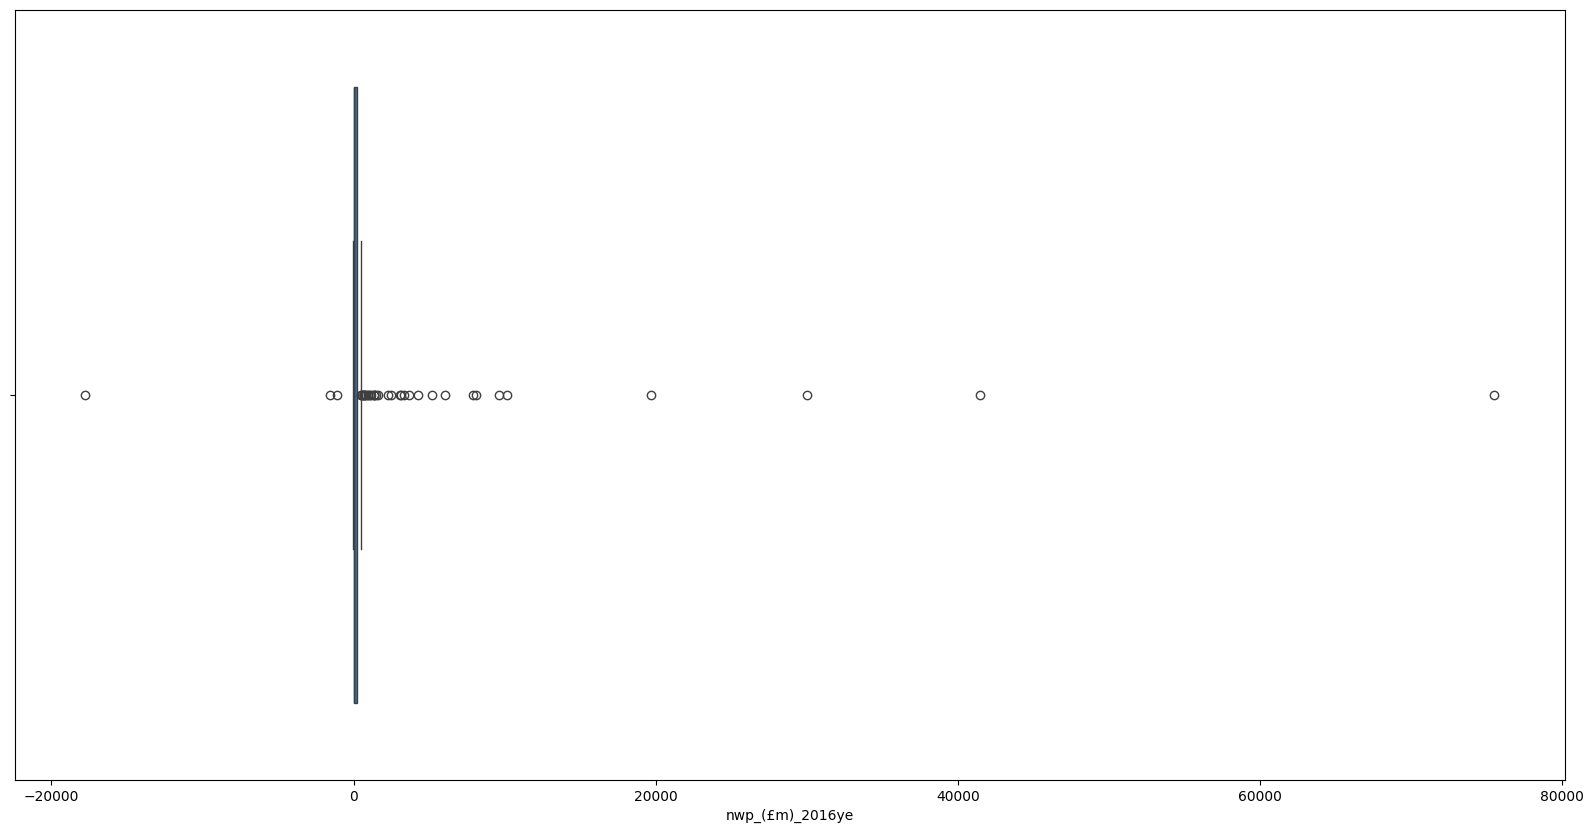

In [253]:
plt.figure(figsize=(20, 10))
sns.boxplot(x= df_all['nwp_(£m)_2016ye'])

There are many outliters, which causes the boxplot to become squashed.

In [254]:
percentile25 = df_filled['nwp_(£m)_2016ye'].quantile(0.25)
percentile75 = df_filled['nwp_(£m)_2016ye'].quantile(0.75)

iqr = percentile75 - percentile25

upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr

In [255]:
outliers = df_filled['nwp_(£m)_2016ye'][(df_filled['nwp_(£m)_2016ye']<lower_limit) | (df_filled['nwp_(£m)_2016ye']>upper_limit)]

In [256]:
outliers

0     -17754.100
3      19677.450
5       3091.390
6       3148.480
9        404.120
10     -3402.040
16      5210.940
18       357.184
22       982.260
24      9622.280
25     75526.670
33     10135.260
37      6060.190
49     -3490.460
72      8118.730
77       417.380
78       765.000
86       482.700
88       431.070
90       803.280
100     7932.400
104    41465.110
106     4240.170
111     1071.746
116     1947.878
119      534.840
131     1141.700
138      700.600
150    -1578.070
157      525.850
161    -3538.194
178     2263.230
181      507.030
196    -3465.554
197    -3407.968
202     1328.940
205      987.258
207     1521.200
209    30031.050
215      964.550
217      671.840
220     1089.080
233     3700.800
239      681.960
241      558.250
242      343.930
246     2489.220
265     1337.910
271     1385.630
294      442.040
300    -1123.890
316     1635.740
321     3315.470
Name: nwp_(£m)_2016ye, dtype: float64

In [257]:
negative_val = df_filled['nwp_(£m)_2016ye'][df_filled['nwp_(£m)_2016ye'] < 0]
negative_val

0     -17754.100
10     -3402.040
32        -4.390
49     -3490.460
55        -0.050
95        -0.020
109       -1.860
150    -1578.070
161    -3538.194
186      -27.840
196    -3465.554
197    -3407.968
206       -0.960
224       -0.040
276       -0.440
297      -33.660
300    -1123.890
310      -15.160
312       -0.010
Name: nwp_(£m)_2016ye, dtype: float64

There doesn't seem to be any reporting errors here

#### nwp_(£m)_2017ye

In [339]:
get_outliers(df_filled, 'nwp_(£m)_2017ye')

3      41072.820
5       3357.930
6       3307.130
7        772.452
9       3882.090
16      1146.930
22       634.610
24      2356.630
25      2187.590
29      5260.730
33      3630.290
37      3345.290
39       950.800
65     -2061.020
72       880.740
75      4143.660
78      2260.208
86       701.490
90       677.870
100     3304.200
101     1980.848
104    18539.930
111     1358.698
119     2406.780
130    11269.330
138      678.890
150    10665.120
178     1028.360
187     2007.610
198    10050.600
202     1031.360
207      741.520
209    19261.410
215      846.030
220     2827.090
233     5344.310
246    25897.340
265      983.210
275     9897.770
280     1557.870
310    14897.660
316     4105.050
321     4136.480
Name: nwp_(£m)_2017ye, dtype: float64

In [340]:
negative_val_nwp_2017 = df_filled['nwp_(£m)_2017ye'][df_filled['nwp_(£m)_2017ye'] < 0]

In [341]:
# Let's look at all the negative values in this column
negative_val_nwp_2017

54     -125.21
59       -5.88
60       -0.66
61      -49.29
65    -2061.02
92       -1.28
109      -2.19
204      -8.38
206      -1.39
229      -0.40
276      -0.03
293      -0.01
302      -0.05
315      -0.11
Name: nwp_(£m)_2017ye, dtype: float64

Again, for this column, there is an outlier negative value in the thousands (-2061), which are likley to be reporting errors. To remove: row 65

#### nwp_(£m)_2018ye

In [342]:
get_outliers(df_filled, "nwp_(£m)_2018ye")

3      20885.510
5       3215.470
6        713.850
7       1622.150
9       6640.430
16      1620.220
22      2043.250
23       897.380
24      1227.710
25     11251.350
29      9063.120
33      3530.840
37      1666.570
50      3812.030
72      6813.490
75      4530.020
78       682.146
79      1744.480
81       563.090
86       672.970
100     2397.450
103    18870.460
106     3969.080
119     6902.890
130     2882.222
138     1013.570
149      993.390
150    12231.910
157     1004.660
171      940.090
178      537.280
187     3059.390
197     3817.218
198    11509.510
209    41591.400
215      629.466
220     2877.090
233     1155.110
241      860.090
246     6237.270
260     3834.948
265      860.370
266      706.550
271      723.060
275     2565.770
280     1286.900
294     2629.880
300      615.720
310    12734.770
315     -368.820
316     4838.900
321     2192.750
Name: nwp_(£m)_2018ye, dtype: float64

In [344]:
negative_val_nwp_2018 = df_filled['nwp_(£m)_2018ye'][df_filled['nwp_(£m)_2018ye'] < 0]
negative_val_nwp_2018

54      -5.160
60      -4.750
61     -38.530
92      -0.030
104    -11.980
143     -0.040
148    -11.010
205    -13.416
276     -0.160
315   -368.820
320     -0.170
Name: nwp_(£m)_2018ye, dtype: float64

To remove: 315

#### nwp_(£m)_2019ye

In [262]:
get_outliers(df_filled, "nwp_(£m)_2019ye")

3      14719.670
6      18232.380
7       1413.288
9       5196.620
16      1256.930
18      2006.290
22      5085.700
24      7134.650
25      6683.960
29      6124.600
37       747.070
50      5655.160
72     11752.060
75      2643.360
78       600.516
79       924.910
81       734.700
86       695.190
88       676.010
90       757.366
100     4804.130
103     1697.620
104    21335.960
106     1213.260
111     1035.046
116     1598.584
119     4542.240
130     1754.406
149     1224.490
150     7970.540
171     1132.220
178     1196.860
198     3395.030
202     1871.570
207     2238.260
209    25473.310
215     1497.686
220     2038.520
233     3998.980
239     1151.330
246     6512.230
260      601.984
265      997.920
271     1017.000
275     1179.990
294     2851.480
300     1962.980
304      795.430
316     4451.740
321     2252.920
Name: nwp_(£m)_2019ye, dtype: float64

Doesn't seem to be any reporting errors here 

#### scr_coverage_ratio_2016ye

In [263]:
get_outliers(df_filled, "scr_coverage_ratio_2016ye")


15          10.670
17          10.360
45          14.950
55          12.700
83     1347117.512
93          10.890
102         44.410
103         19.020
141          8.830
142          9.190
145         16.850
156          8.730
162         12.460
182         -3.490
184    1347115.326
208          7.490
211          9.110
216          7.280
231         11.070
234         12.650
242          9.420
276          9.460
290        170.160
305         13.550
318         68.400
319    6735557.780
Name: scr_coverage_ratio_2016ye, dtype: float64

Rows 83, 184, 319 seem to be a lot bigger than the other outliers and some of them are almost the same number

In [264]:
df_filled['scr_coverage_ratio_2016ye'][df_filled['scr_coverage_ratio_2016ye'] < 0]

108   -1.14
140   -0.64
182   -3.49
212   -0.10
224   -0.36
255   -0.03
Name: scr_coverage_ratio_2016ye, dtype: float64

#### scr_coverage_ratio_2017ye

In [265]:
get_outliers(df_filled, "scr_coverage_ratio_2017ye")


0      5.588700e+07
10     1.117740e+07
15     2.785000e+01
17     2.917000e+01
18     1.266400e+01
20     2.091000e+01
26     9.690000e+00
30     9.930000e+00
36     1.002000e+01
45     1.035000e+01
54     8.860000e+00
55     9.680000e+00
57     1.287000e+01
70     1.998606e+08
101    1.367000e+01
102    1.153000e+01
103    1.101000e+01
111    1.998606e+08
116    1.545000e+01
121    1.578000e+01
124    6.259000e+01
126    2.258551e+05
130    9.269834e+08
156    9.750000e+00
162    2.187000e+01
167    8.380000e+00
171    8.990000e+00
176    9.090000e+00
185    4.229000e+01
189    1.102000e+01
196    1.117740e+07
197    1.117740e+07
215    9.993029e+08
246    1.082000e+01
290    6.854000e+01
313    1.794000e+01
318    2.165000e+01
320    2.464000e+01
Name: scr_coverage_ratio_2017ye, dtype: float64

To remove: 215, 197, 196, 130, 70, 10, 0. These numbers are many exponents larger than the others

#### scr_coverage_ratio_2018ye

In [266]:
get_outliers(df_filled, "scr_coverage_ratio_2018ye")


0           11.344
1           10.240
15          21.480
17          14.840
19           8.450
55          25.760
65     7161991.980
93          16.640
94          20.390
107          8.980
121          8.650
126     168645.750
145         11.710
156         13.840
162         21.530
176         26.280
185         42.740
189         26.490
190         10.890
197      33730.726
211          8.220
214          8.032
216          9.130
218         10.080
231         17.370
270         11.590
277         25.870
290        102.450
292         11.656
299          8.420
305         13.300
311         12.000
313         17.000
318         31.720
322         22.540
Name: scr_coverage_ratio_2018ye, dtype: float64

To remove: 65,126, 197

#### scr_coverage_ratio_2019ye

In [267]:
get_outliers(df_filled, "scr_coverage_ratio_2019ye")


17        26.170
23         9.860
30         8.282
52        31.260
55        28.310
59        15.422
90        39.618
102       66.240
109       16.008
124       17.830
126    84538.370
141       14.668
162       23.510
167       12.320
171        9.380
185       24.780
189       11.600
196        8.690
197    16910.298
208        8.350
214       11.060
231       16.880
246       15.210
270        7.670
276       10.600
277       13.610
281       24.390
290      125.190
311       19.290
318       32.710
322       67.280
Name: scr_coverage_ratio_2019ye, dtype: float64

TO remove: 197, 126. 197 has been appearing a lot, perhaps it is not an reporting outlier 

#### scr_coverage_ratio_2020ye

In [268]:
get_outliers(df_filled, "scr_coverage_ratio_2020ye")

16        16.740
17        15.496
23        15.606
30        15.438
35        15.430
43         9.580
52        21.780
93        15.790
102       10.240
107       10.500
126    89529.280
141        9.910
145       19.140
151       16.900
162       15.922
166        9.544
176       12.230
185       10.570
192       16.740
197    17906.672
204       15.270
214       15.550
223       12.950
231       28.760
237       16.558
238       15.818
270       15.710
276       11.374
277       24.750
281       25.150
288        9.832
290       15.488
299       20.470
305       17.510
311       40.340
313       10.882
318        9.502
Name: scr_coverage_ratio_2020ye, dtype: float64

Again, 197 and 126. Because these rows have appeared a lot, I don't think they are reporting errors, so I will not remove these rows

#### gwp_(£m)_2016ye

In [269]:
get_outliers(df_filled, "gwp_(£m)_2016ye")

3      43375.810
5       1966.060
6       4169.540
9        678.220
16      3651.620
18      1231.356
22      2177.670
24      4169.960
25     17208.390
29      2213.110
33      7875.720
37      7063.980
39      2358.140
70      3074.260
71       706.890
72      4615.600
75      2855.240
79      3133.350
100    12011.620
104    29995.220
106     3523.330
111     1787.714
116      841.836
119     1263.090
138     1264.610
149      727.540
150    12222.420
157     1181.780
178     3171.780
187      898.370
196      813.330
202     2018.810
205      838.304
209    18971.290
215     2560.800
233     5694.660
239      660.110
246     5681.610
250      776.670
280     1317.920
294     1087.380
300     2339.220
310      845.520
316     2476.650
Name: gwp_(£m)_2016ye, dtype: float64

#### gwp_(£m)_2017ye

In [270]:
get_outliers(df_filled, "gwp_(£m)_2017ye")

3      23689.620
5       1199.660
6      12689.070
7       2184.366
9       9887.800
16      5132.980
24      1758.190
25     13019.600
33      4506.760
37      6202.570
39      1632.590
52      1774.370
71       776.640
72      2419.700
75      2374.110
79      2371.760
90      3386.540
100    12883.170
106     5981.030
111     1000.924
119     5740.060
130     1409.590
131     1356.270
138     1300.190
150     8634.610
178     1063.220
181      839.410
187     2989.560
198     4428.240
202     3338.720
207     3796.290
209    30581.960
215     1768.970
233     2437.360
239      791.340
241      718.370
246    43569.200
271     2469.620
275      861.810
280     2364.470
291      816.680
294     3195.330
300     4340.870
304     1609.000
310    17291.290
316     2105.030
321     2472.330
Name: gwp_(£m)_2017ye, dtype: float64

#### gwp_(£m)_2018ye

In [271]:
get_outliers(df_filled, "gwp_(£m)_2018ye")

3      68276.760
5       4061.620
6       5814.000
7       1305.618
9       9002.110
18      1316.878
22      2036.310
24      5927.700
25      3419.690
29      6803.620
33      8107.790
37      4720.200
39      1456.840
50      4289.490
71       931.750
72     10334.860
75      1631.940
78      2323.946
79      2646.850
90      3929.990
100     3854.220
101     1977.564
103    15841.840
104    11934.120
119     3032.330
130     2175.926
131     1935.520
171      931.158
178     5942.230
187     2338.330
197     3270.028
198    14072.910
207     3096.540
209    74078.640
220     1174.890
226      964.800
233     1717.350
246    12047.810
260     3278.398
265     1656.450
271     1024.220
275     9830.580
280     1588.170
294     2815.830
297     1003.290
300      907.300
310    21432.680
316     2833.770
321     2287.800
Name: gwp_(£m)_2018ye, dtype: float64

#### gwp_(£m)_2019ye

In [272]:
get_outliers(df_filled, "gwp_(£m)_2019ye")

3      41081.450
5       7464.340
6       4224.700
7       1311.740
9      10552.590
16      2037.690
18      3535.430
22      2016.240
24      1198.250
25      8013.280
29      2301.230
33     11427.640
37      3259.782
39      2236.500
44       819.650
50      6855.900
72     23667.380
75      2353.590
78      1364.832
81       785.650
98       932.920
100     4418.480
101     1089.242
103     1852.230
104    18504.740
106     5989.990
111      875.668
119     4823.980
130     2639.434
150     2494.650
157     1479.230
171     1377.896
178     1366.584
187     3177.660
198     9572.920
202     2781.120
207      956.730
209    72456.770
220     2989.550
233     3665.820
246     7300.860
265     1346.220
275     5385.560
294      978.810
300     1801.970
304     1182.350
310    21730.530
317     1615.590
321     1979.540
Name: gwp_(£m)_2019ye, dtype: float64

#### gwp_(£m)_2020ye

In [273]:
get_outliers(df_filled, "gwp_(£m)_2020ye")

3      37761.880
5       4209.120
6      16183.570
9        882.480
18      3135.960
22      3563.600
24      7031.520
25     10352.250
29      3093.820
33     19274.960
34       906.340
37      1819.170
50      2524.620
71       995.090
72      6173.510
78      1404.418
79      2321.460
100     4618.066
101     1120.898
103     5256.830
104     5857.040
106      954.770
111     1049.850
116     1701.028
130     1902.238
150    15824.690
157     1212.330
178     1422.910
187     1449.720
196      975.460
197     1289.838
198     2305.410
209    69697.930
215     1006.300
220     2164.010
233     4051.510
239     1100.620
246     9115.190
260     1296.102
265      924.940
271     1216.070
274     1005.910
275     5587.210
279     1031.350
280     1826.840
297     1087.450
300     2471.330
304     1379.130
310    24251.480
316     3716.100
321     1129.660
Name: gwp_(£m)_2020ye, dtype: float64

#### gross_claims_incurred_(£m)_2016ye

In [279]:
get_outliers(df_filled, "gross_claims_incurred_(£m)_2016ye")

16      516.612240
21      652.464733
24     1146.991043
36     1724.354082
51      739.407306
73      384.828013
80      747.637051
95      415.314907
104    3241.249494
111    5493.752266
157    1076.941342
162     621.039549
164     393.013170
186     433.694154
199    1497.365997
209     437.090537
215    5619.611745
224     559.515720
233    1210.953750
242     333.618861
259     420.063696
260     509.954366
271     404.863865
276     347.249930
279    1102.319744
282    3277.180297
291     896.915851
296     337.016353
Name: gross_claims_incurred_(£m)_2016ye, dtype: float64

#### gross_claims_incurred_(£m)_2017ye

In [280]:
get_outliers(df_filled, "gross_claims_incurred_(£m)_2017ye")

16     3608.238396
21     1664.599984
24     2624.947115
37      568.187385
51     2373.620757
73     1645.533721
80     1010.011366
95     1173.697190
104    4801.320297
109     979.802118
111    3056.395527
117     593.559772
157     878.922426
162    1096.406518
199    2099.647242
215    4134.248614
224     871.339497
233    2521.344970
260    1840.060421
274    1701.492419
279    1339.926384
282    1706.520629
285    3946.754593
Name: gross_claims_incurred_(£m)_2017ye, dtype: float64

#### gross_claims_incurred_(£m)_2018ye

In [281]:
get_outliers(df_filled, "gross_claims_incurred_(£m)_2018ye")

4       691.379668
5       364.148755
16      628.252809
17      673.362109
21     2367.905042
24     1398.276871
36     1366.018019
37      380.038431
42      452.870077
48     1586.381799
51     1464.804196
73     1494.032700
80     1141.449343
104    2293.386064
111    2976.640084
115     384.244540
130     391.702170
142     608.932896
146     459.742680
157     807.944044
167     391.512850
182     355.948371
215    6844.014131
224     769.055009
229     478.966534
233    3031.649051
259     544.798685
260    1007.916249
276     367.515127
279    1402.381769
282     890.985263
285     986.399281
296     712.243785
304     550.328133
Name: gross_claims_incurred_(£m)_2018ye, dtype: float64

#### gross_claims_incurred_(£m)_2019ye

In [282]:
get_outliers(df_filled, "gross_claims_incurred_(£m)_2019ye")

16     1420.733285
18      552.042778
21      977.572233
24     1102.789714
36     1253.042739
48      596.443074
51     2771.217904
73     1129.313563
80     1288.015406
101     576.804241
104    3223.760583
111     911.681579
117     582.628495
159     471.019281
188     486.034936
198     880.149473
209     652.945309
217     476.590815
224     890.375484
233    1248.740155
260    1188.360269
272     430.276370
277     570.286831
279    1064.129998
282    1351.267571
285    1278.582075
296    1444.673950
Name: gross_claims_incurred_(£m)_2019ye, dtype: float64

#### gross_claims_incurred_(£m)_2020ye

In [283]:
get_outliers(df_filled, "gross_claims_incurred_(£m)_2020ye")

16     1426.122857
21     1092.389998
24      620.866934
25      624.989604
36      639.228642
37      360.052219
51     1783.541113
73      390.281156
80      802.321712
104     530.529650
111    2296.659215
115     602.497006
117     469.663782
157    2214.251988
164     633.912587
188     336.851437
197     340.298786
209    1024.038151
215     466.891097
217     431.375361
224     615.042414
229     452.152393
233    1231.550938
242     367.075806
260     833.614387
272     461.610690
279    1228.990606
282    2730.730064
285    1710.897869
296    1014.166638
298     459.980859
303     487.136071
304     345.047503
312     567.314567
Name: gross_claims_incurred_(£m)_2020ye, dtype: float64

#### net_combined_ratio_2016ye

In [284]:
display(get_outliers(df_filled, "net_combined_ratio_2016ye").tail(50))


70      -6.650525
71     114.265666
72      -6.532366
75      -6.532366
82      11.592630
86       8.996579
87       8.752208
91      -9.525178
105     -6.465700
106     -6.532366
107      9.099827
110     -6.453210
119     -6.532366
121     -2.367886
126     -2.276228
138     -6.328094
144     -2.462112
147     -6.407544
153     -6.783165
154     10.224688
156     -6.541651
160    169.205026
165    144.452073
168     13.508548
170      9.063742
172     -9.365340
174     -6.235011
178     23.549755
187    -35.212859
190    -15.805683
192      3.038419
194     -2.463854
204      9.368764
207     -6.273547
213      9.368764
216     -6.378497
222     -5.884994
227      9.164847
247     58.001931
248     12.665236
249     12.262465
264     -6.575263
265     -6.204941
269     40.797170
288      9.134538
291     23.748773
306     35.853495
307     -1.304057
310     -6.302123
324     -6.331425
Name: net_combined_ratio_2016ye, dtype: float64

#### net_combined_ratio_2018ye

In [285]:
get_outliers(df_filled, "net_combined_ratio_2018ye")


7        -0.962193
19        5.653540
26        8.457254
27     2312.744794
28        2.616031
45        4.120150
46        7.144685
50        4.359010
60        2.709200
63        8.626127
68        8.824178
69        5.646093
71       31.512398
72        2.709738
82       18.131831
87       25.023177
121       5.126295
125       6.057542
144       8.767153
150      -2.875153
161     466.001577
172       5.191363
177       4.618706
178       7.129046
182       3.200846
187     463.403971
190       5.555793
200       5.166185
207       3.973810
225       4.462046
227       3.764511
234       5.516263
247       9.133631
251       5.691915
269       5.782262
270       9.201816
288       8.767153
291       7.064045
302       9.299302
303       4.016758
Name: net_combined_ratio_2018ye, dtype: float64

In [286]:
negative_val_ncr_2018 = df_filled['net_combined_ratio_2018ye'][df_filled['net_combined_ratio_2018ye'] < 0]

In [287]:
negative_val_ncr_2018

7     -0.962193
49    -0.156452
150   -2.875153
307   -0.170667
Name: net_combined_ratio_2018ye, dtype: float64

The negative outlier values do not seem to be a reporting error as it isn't too far off from the other negative values

Here, row 27 could be a reporting error, where the decimal place could have been misplaced, resulting in an abnormally high number compared to the rest of the other outliers. To remove: 27

In [288]:
df_filled.columns

Index(['nwp_(£m)_2016ye', 'nwp_(£m)_2017ye', 'nwp_(£m)_2018ye',
       'nwp_(£m)_2019ye', 'nwp_(£m)_2020ye', 'scr_coverage_ratio_2016ye',
       'scr_coverage_ratio_2017ye', 'scr_coverage_ratio_2018ye',
       'scr_coverage_ratio_2019ye', 'scr_coverage_ratio_2020ye',
       'gwp_(£m)_2016ye', 'gwp_(£m)_2017ye', 'gwp_(£m)_2018ye',
       'gwp_(£m)_2019ye', 'gwp_(£m)_2020ye',
       'excess_of_assets_over_liabilities_(£m)_[=_equity]_2016ye',
       'excess_of_assets_over_liabilities_(£m)_[=_equity]_2017ye',
       'excess_of_assets_over_liabilities_(£m)_[=_equity]_2018ye',
       'excess_of_assets_over_liabilities_(£m)_[=_equity]_2019ye',
       'excess_of_assets_over_liabilities_(£m)_[=_equity]_2020ye',
       'gross_claims_incurred_(£m)_2016ye',
       'gross_claims_incurred_(£m)_2017ye',
       'gross_claims_incurred_(£m)_2018ye',
       'gross_claims_incurred_(£m)_2019ye',
       'gross_claims_incurred_(£m)_2020ye', 'net_combined_ratio_2016ye',
       'net_combined_ratio_2017ye', 'ne

#### net_combined_ratio_2017ye

In [289]:
get_outliers(df_filled, 'net_combined_ratio_2017ye')

0         71.298841
6         14.742779
26       635.309117
27       392.004673
33         5.041302
45         3.756104
48        -5.568479
49        -1.137656
50        -1.371818
63       635.246163
69      3157.376935
71       -17.824058
82        16.448333
89       631.944826
98    -73450.271010
144        4.109446
145       -1.912660
154      631.940794
160       -7.816480
161      649.340338
165       -2.262874
177        5.693636
178       -2.938244
187   -14596.983163
190        3.633507
191      632.244616
198        3.984336
200        9.401142
207        3.487630
225        4.107272
227        4.040580
247        3.633507
283   -14689.452408
288        4.027973
291       -2.566041
302        3.868419
303        5.515897
Name: net_combined_ratio_2017ye, dtype: float64

Again, several rows here in the negative thousands. They are likely to be reporting errors. TO REMOVE: 98, 187, 283

#### net_combined_ratio_2019ye

In [290]:
display(get_outliers(df_filled, "net_combined_ratio_2019ye"))


3          3.817221
27       130.707489
38        13.162528
54      -224.127946
63        -1.151153
68         4.237511
69         4.216687
70         3.775989
71        36.072187
82       -20.863967
87         5.639267
92         3.698507
95         4.216687
98       130.223076
120        4.041151
128        3.980789
132        3.835302
145      -25.504958
154        3.146640
160      -11.708458
161        7.386923
165     -112.901570
173        3.519384
177       -2.790345
178        8.111326
186        4.216687
187    43182.186320
199        4.216687
215      174.299581
218       -1.522907
222        3.441053
223        3.266816
227      173.339392
235        4.091212
269        4.232640
278        3.196392
281       -1.921219
283      860.263014
291      172.724254
292        3.550876
294     8637.738432
306       -1.433343
315        3.265260
317        2.931312
Name: net_combined_ratio_2019ye, dtype: float64

To remove: 187, 294

#### net_combined_ratio_2020ye

In [291]:
display(get_outliers(df_filled, "net_combined_ratio_2020ye"))


3        -3.548731
7       330.875138
8         3.794598
27      658.727895
32      327.518520
38        7.566522
45      245.162171
63      245.893163
68        5.275190
69      332.825042
71       15.857819
82      332.347342
87        5.178020
94      329.013325
95        5.275190
98      332.729096
120       5.275190
129       4.227190
132     330.934493
144       3.912073
145       6.825804
161       5.392554
165    1222.879483
173       4.407631
177      11.444875
178       4.069566
186       4.291542
187     331.262241
190       4.031692
199       5.275190
200       3.706795
202       3.654313
215     327.261885
218     329.583349
222     329.305640
223       3.961065
227    1642.927280
234     330.314161
235       5.275190
247       4.089963
250     -11.124374
251       3.816325
269       5.529513
270       3.994446
278     330.986128
283    1630.065399
288       3.912073
289       4.181379
291     326.718271
306     329.161665
307      -1.823236
Name: net_combined_ratio_2020ye

TO remove: 165, 227, 283

### Removing outliers

We have now uncovered some causes of the outliers - some may be reporting errors as they may be several times larger than other outliers (e.g: numbers in the thousands), some may be genuine outliers

I have compiled a list of all the outliers that look like reporting errors:
- nwp_(£m)_2017ye:  65
- nwp_(£m)_2018ye: 315
- scr_coverage_ratio_2016ye: 83, 184, 319
- scr_coverage_ratio_2017ye: 215, 196, 130, 70, 10, 0.
- scr_coverage_ratio_2018ye: 65
- net_combined_ratio_2018ye: 27
- net_combined_ratio_2017ye: 98, 187, 283
- net_combined_ratio_2019ye: 187, 294

116 appears as an outlier in many columns, which makes me think that the numbers for 116 weren't reporting errors. 

In [345]:
outliers_to_remove = [65, 315,  83, 184, 319, 215, 196, 130, 70, 10, 0,65, 27, 98, 187, 283, 187, 294  ]

In [346]:
df_new = df_filled.drop(labels=outliers_to_remove, axis=0)

In [348]:
len(df_new)

299

In [349]:
df_new_firm = df_new.merge(firms_null, left_index=True, right_index=True, how='inner')

In [350]:
df_new_firm[df_new_firm['firm']=='firm_81']

nwp_(£m)_2016ye  nwp_(£m)_2017ye  nwp_(£m)_2018ye  nwp_(£m)_2019ye  \
80             0.06             0.18             0.19             0.02   

    nwp_(£m)_2020ye  scr_coverage_ratio_2016ye  scr_coverage_ratio_2017ye  \
80             0.13                       0.99                       6.59   

    scr_coverage_ratio_2018ye  scr_coverage_ratio_2019ye  \
80                       6.79                       1.69   

    scr_coverage_ratio_2020ye  gwp_(£m)_2016ye  gwp_(£m)_2017ye  \
80                       5.14             1.14             0.12   

    gwp_(£m)_2018ye  gwp_(£m)_2019ye  gwp_(£m)_2020ye  \
80              0.1             0.19             0.07   

    excess_of_assets_over_liabilities_(£m)_[=_equity]_2016ye  \
80                                               3.74          

    excess_of_assets_over_liabilities_(£m)_[=_equity]_2017ye  \
80                                               0.73          

    excess_of_assets_over_liabilities_(£m)_[=_equity]_2018ye  \
80                                               4.23          

    excess_of_assets_over_liabilities_(£m)_[=_equity]_2019ye  \
80                                               0.67          

    excess_of_assets_over_liabilities_(£m)_[=_equity]_2020ye  \
80                                                4.6          

    gross_claims_incurred_(£m)_2016ye  gross_claims_incurred_(£m)_2017ye  \
80                         747.637051                        1010.011366   

    gross_claims_incurred_(£m)_2018ye  gross_claims_incurred_(£m)_2019ye  \
80                        1141.449343                        1288.015406   

    gross_claims_incurred_(£m)_2020ye  net_combined_ratio_2016ye  \
80                         802.321712                   1.845308   

    net_combined_ratio_2017ye  net_combined_ratio_2018ye  \
80                   0.384323                   0.799446   

    net_combined_ratio_2019ye  net_combined_ratio_2020ye     firm  
80                   0.666041                   1.338463  firm_81

In [351]:
len(df_filled)

315

### Plots

# Transform the data into useful columns

In [354]:
df_new[['gross_claims_incurred_(£m)_2016ye', 'gross_claims_incurred_(£m)_2017ye']].head(30)

gross_claims_incurred_(£m)_2016ye  gross_claims_incurred_(£m)_2017ye
1                           44.467865                          29.489599
2                          158.023629                         422.583317
3                           14.340939                          71.062447
4                           48.738606                         425.748869
5                          125.076792                         457.319722
6                          169.588766                         450.178881
7                            0.107354                          -0.027761
8                          213.496532                          87.593124
9                            3.671436                         100.897255
11                         114.749853                          39.986185
12                         271.092946                         152.265569
13                         133.662586                         474.520098
14                         137.263040                         182.923147
15                         124.069427                         257.418688
16                         516.612240                        3608.238396
17                           8.253866                         362.363403
18                         140.843662                         422.620411
19                          99.099142                         209.686748
20                           1.561216                           3.083069
21                         652.464733                        1664.599984
22                          14.305737                         107.750231
23                          52.971796                          62.725275
24                        1146.991043                        2624.947115
25                         297.094978                         430.837353
26                           0.026911                          -0.194812
28                           3.021324                           1.085875
29                          -0.021586                          25.163129
30                          27.644795                          12.591915
31                          12.246409                          19.395358
32                         320.461787                          71.952914

In [355]:
df_new.columns

Index(['nwp_(£m)_2016ye', 'nwp_(£m)_2017ye', 'nwp_(£m)_2018ye',
       'nwp_(£m)_2019ye', 'nwp_(£m)_2020ye', 'scr_coverage_ratio_2016ye',
       'scr_coverage_ratio_2017ye', 'scr_coverage_ratio_2018ye',
       'scr_coverage_ratio_2019ye', 'scr_coverage_ratio_2020ye',
       'gwp_(£m)_2016ye', 'gwp_(£m)_2017ye', 'gwp_(£m)_2018ye',
       'gwp_(£m)_2019ye', 'gwp_(£m)_2020ye',
       'excess_of_assets_over_liabilities_(£m)_[=_equity]_2016ye',
       'excess_of_assets_over_liabilities_(£m)_[=_equity]_2017ye',
       'excess_of_assets_over_liabilities_(£m)_[=_equity]_2018ye',
       'excess_of_assets_over_liabilities_(£m)_[=_equity]_2019ye',
       'excess_of_assets_over_liabilities_(£m)_[=_equity]_2020ye',
       'gross_claims_incurred_(£m)_2016ye',
       'gross_claims_incurred_(£m)_2017ye',
       'gross_claims_incurred_(£m)_2018ye',
       'gross_claims_incurred_(£m)_2019ye',
       'gross_claims_incurred_(£m)_2020ye', 'net_combined_ratio_2016ye',
       'net_combined_ratio_2017ye', 'ne

##  NWP/GWP ratio

In [424]:
# Calculating NWP/GWP - shows how much of firm's risk is passed onto insurers. 
# High ratio - firm retains higher risk. 
# Low ratio - firm retains lower risk as more risk is pass onto reinsurer

df_new['nwp/gwp_2016ye'] = df_new['nwp_(£m)_2016ye']/df_new['gwp_(£m)_2016ye']
df_new['nwp/gwp_2017ye'] = df_new['nwp_(£m)_2017ye']/df_new['gwp_(£m)_2017ye']
df_new['nwp/gwp_2018ye'] = df_new['nwp_(£m)_2018ye']/df_new['gwp_(£m)_2018ye']
df_new['nwp/gwp_2019ye'] = df_new['nwp_(£m)_2019ye']/df_new['gwp_(£m)_2019ye']
df_new['nwp/gwp_2020ye'] = df_new['nwp_(£m)_2020ye']/df_new['gwp_(£m)_2020ye']

In [425]:
# Calculate the average nwp/gwp ratio for each firm over the past 4 years
df_cols = list(df_new)
nwp_gwp_ratio_list = [i for i in df_cols if "nwp/gwp" in i]
nwp_gwp_ratio = df_new[nwp_gwp_ratio_list]

In [426]:
nwp_gwp_ratio['mean_nwp/gwp_ratio'] = nwp_gwp_ratio.mean(axis=1)

/var/folders/0k/g6vhmrs974937h1lwrj16q5c0000gn/T/ipykernel_7328/3174509776.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nwp_gwp_ratio['mean_nwp/gwp_ratio'] = nwp_gwp_ratio.mean(axis=1)


In [427]:
nwp_gwp_ratio = nwp_gwp_ratio.merge(firms_null, left_index=True, right_index=True, how='left')
nwp_gwp_ratio

nwp/gwp_2016ye  nwp/gwp_2017ye  nwp/gwp_2018ye  nwp/gwp_2019ye  \
1          0.221106        0.016155        3.524180        9.161954   
2          0.018634        0.011893        0.265209        0.583014   
3          0.453650        1.733790        0.305895        0.358305   
4          1.606510        0.186559        1.434649        4.412222   
5          1.572378        2.799068        0.791672        0.007130   
6          0.755114        0.260628        0.122781        4.315663   
7          0.442319        0.353628        1.242438        1.077415   
8          0.459273        0.621876        0.871160        0.014415   
9          0.595854        0.392614        0.737653        0.492450   
11         0.497852        1.328495        1.795627        1.529670   
12        10.268293        3.201550        2.423423        1.248963   
13         1.484115        0.745845        1.312600        0.991041   
14         0.065476        0.521332        1.770468       15.687500   
15         0.225094        0.858606        0.411846        0.652708   
16         1.427021        0.223443        4.705291        0.616841   
17         0.470229        1.249169        1.669201        1.446352   
18         0.290074       14.396844        0.265519        0.567481   
19      1330.600000        0.100000        0.832504        4.188608   
20         0.562997        0.662345        0.646988        1.507353   
21         0.108147        6.305687        0.719588        0.858380   
22         0.451060       10.868471        1.003408        2.522368   
23         1.160574        0.994840        2.482310        1.811009   
24         2.307523        1.340373        0.207114        5.954225   
25         4.388945        0.168023        3.290167        0.834110   
26         0.000571        3.050184        0.752718        1.103149   
28         0.653643        0.774311        0.319285        1.039749   
29         0.089675       12.047381        1.332103        2.661446   
30      -483.200000        1.094769        1.196594        2.391948   
31         0.136766        2.145605        3.195706        0.283392   
32        -4.221154        4.951020        0.480031        6.356467   
33         1.286899        0.805521        0.435487       -0.016109   
34         1.118960        0.370564        0.555253        1.492038   
35         2.442931        0.777778        0.190761        0.264311   
36         5.235110        2.033607        0.880186        0.071174   
37         0.857900        0.539339        0.353072        0.229178   
38         1.268203       23.697674       24.437500        0.220447   
39         0.070632        0.582387        0.269309        0.177612   
40         1.268256        3.931507        2.352941        0.473577   
41         0.335766        0.013000        0.293970        0.110739   
42         2.690889        0.735424        2.055527        0.886647   
43         5.282398        0.201754        1.404615       27.712644   
44         1.088456        0.455479        0.559150        0.097261   
45         0.024896        0.004688        0.066467        0.033915   
46         0.812072        1.905767        0.248009        1.503259   
47         0.096515       67.272727        0.814091        0.881416   
48         0.083812        1.765854        1.077128        0.656915   
49       -27.117951        1.941058        0.666773        0.465918   
50         0.643783        0.633187        0.888691        0.824860   
51         2.055077        1.059645        0.147830        0.092593   
52         0.060705        0.246442        4.949406        0.072573   
53         0.522291        3.105722        0.886395        0.625115   
54        -0.085945      403.903226      -12.585366        0.662133   
55         1.000000        4.917102        3.294496        3.635008   
56        12.851852        0.764760        2.180965        1.016578   
57         0.949644        9.134574        1.082974        1.080435   
58         0.050804        0.

In [428]:
nwp_gwp_ratio.head(5)

nwp/gwp_2016ye  nwp/gwp_2017ye  nwp/gwp_2018ye  nwp/gwp_2019ye  \
1        0.221106        0.016155        3.524180        9.161954   
2        0.018634        0.011893        0.265209        0.583014   
3        0.453650        1.733790        0.305895        0.358305   
4        1.606510        0.186559        1.434649        4.412222   
5        1.572378        2.799068        0.791672        0.007130   

   nwp/gwp_2020ye  mean_nwp/gwp_ratio    firm  
1        0.815191            2.747717  firm_2  
2        1.435992            0.462948  firm_3  
3        1.303020            0.830932  firm_4  
4        1.912330            1.910454  firm_5  
5        1.418280            1.317706  firm_6

In [435]:
nwp_gwp_ratio_top10 = nwp_gwp_ratio.sort_values(ascending=False, by= 'mean_nwp/gwp_ratio').head(10)
nwp_gwp_ratio_top10

nwp/gwp_2016ye  nwp/gwp_2017ye  nwp/gwp_2018ye  nwp/gwp_2019ye  \
275     8355.600000       11.484863        0.260999        0.219103   
19      1330.600000        0.100000        0.832504        4.188608   
305      168.666667        1.241112      578.200000      374.900000   
185      380.333333      236.066667      285.733333     -460.600000   
54        -0.085945      403.903226      -12.585366        0.662133   
293        0.278210       -0.000716       99.963636      186.100000   
86       205.404255        5.313916        1.836608        3.460034   
272        6.673669        1.238306      162.857143        0.366876   
94         0.478862        1.000000      144.700000        0.608283   
150       -0.129113        1.235159      129.328716        3.195053   

     nwp/gwp_2020ye  mean_nwp/gwp_ratio      firm  
275        0.550144         1673.623022  firm_276  
19         0.602893          267.264801   firm_20  
305       -1.169265          224.367703  firm_306  
185      225.850000          133.476667  firm_186  
54         3.716489           79.122107   firm_55  
293        1.358456           57.539917  firm_294  
86         0.327925           43.268548   firm_87  
272        0.187482           34.264695  firm_273  
94         1.713444           29.700118   firm_95  
150        0.350986           26.796161  firm_151

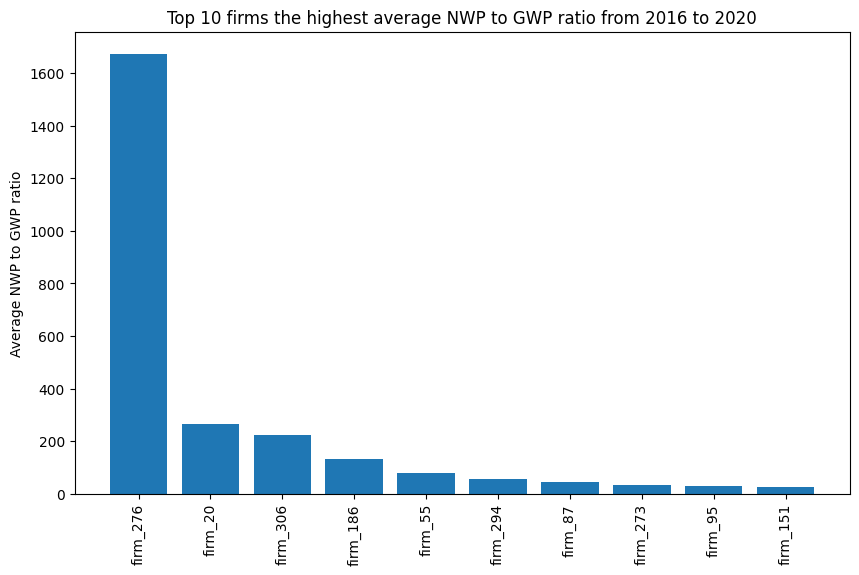

In [486]:
plt.figure(figsize=(10,6))
plt.bar(nwp_gwp_ratio_top10['firm'], nwp_gwp_ratio_top10['mean_nwp/gwp_ratio'])
plt.ylabel('Average NWP to GWP ratio')
plt.title('Top 10 firms the highest average NWP to GWP ratio from 2016 to 2020')
plt.xticks(rotation=90)
plt.show()

## Gross Claims Incurred

In [357]:
# Year on year changes - Gross Claims Incurred 

gci_only = ['gross_claims_incurred_(£m)_2016ye',
       'gross_claims_incurred_(£m)_2017ye',
       'gross_claims_incurred_(£m)_2018ye',
       'gross_claims_incurred_(£m)_2019ye',
       'gross_claims_incurred_(£m)_2020ye']

gci_df = df_new[gci_only]
gci_change = gci_df.pct_change(axis=1)
gci_change = gci_change.drop(columns=['gross_claims_incurred_(£m)_2016ye'])

In [358]:
gci_df

gross_claims_incurred_(£m)_2016ye  gross_claims_incurred_(£m)_2017ye  \
1                            44.467865                          29.489599   
2                           158.023629                         422.583317   
3                            14.340939                          71.062447   
4                            48.738606                         425.748869   
5                           125.076792                         457.319722   
6                           169.588766                         450.178881   
7                             0.107354                          -0.027761   
8                           213.496532                          87.593124   
9                             3.671436                         100.897255   
11                          114.749853                          39.986185   
12                          271.092946                         152.265569   
13                          133.662586                         474.520098   
14                          137.263040                         182.923147   
15                          124.069427                         257.418688   
16                          516.612240                        3608.238396   
17                            8.253866                         362.363403   
18                          140.843662                         422.620411   
19                           99.099142                         209.686748   
20                            1.561216                           3.083069   
21                          652.464733                        1664.599984   
22                           14.305737                         107.750231   
23                           52.971796                          62.725275   
24                         1146.991043                        2624.947115   
25                          297.094978                         430.837353   
26                            0.026911                          -0.194812   
28                            3.021324                           1.085875   
29                           -0.021586                          25.163129   
30                           27.644795                          12.591915   
31                           12.246409                          19.395358   
32                          320.461787                          71.952914   
33                            8.330638                           4.877267   
34                           48.702124                          79.331282   
35                           35.697626                          10.369594   
36                         1724.354082                           0.161450   
37                          214.186534                         568.187385   
38                           83.351215                         223.123989   
39                            5.419215                          17.511765   
40                            2.577135                          37.386513   
41                           45.352316                          85.968602   
42                          130.797370                         174.877153   
43                            0.436477                           0.096352   
44                          110.585740                         453.326592   
45                           -0.680047                          -2.068244   
46                           47.631198                         -12.201303   
47                           87.176171                          97.722295   
48                          -11.810687                         -18.740863   
49                            0.008391                           0.181250   
50                           12.259449                         -10.194532   
51                          739.407306                        2373.620757   
52                            1.125856                           2.339556   
53                           40.625222                          59.268449   
5

In [359]:
firm = df_all['firm']
firm = firm.to_frame()

In [360]:
gci_firms = gci_df.join(firm)

In [361]:
gci_firms

gross_claims_incurred_(£m)_2016ye  gross_claims_incurred_(£m)_2017ye  \
1                            44.467865                          29.489599   
2                           158.023629                         422.583317   
3                            14.340939                          71.062447   
4                            48.738606                         425.748869   
5                           125.076792                         457.319722   
6                           169.588766                         450.178881   
7                             0.107354                          -0.027761   
8                           213.496532                          87.593124   
9                             3.671436                         100.897255   
11                          114.749853                          39.986185   
12                          271.092946                         152.265569   
13                          133.662586                         474.520098   
14                          137.263040                         182.923147   
15                          124.069427                         257.418688   
16                          516.612240                        3608.238396   
17                            8.253866                         362.363403   
18                          140.843662                         422.620411   
19                           99.099142                         209.686748   
20                            1.561216                           3.083069   
21                          652.464733                        1664.599984   
22                           14.305737                         107.750231   
23                           52.971796                          62.725275   
24                         1146.991043                        2624.947115   
25                          297.094978                         430.837353   
26                            0.026911                          -0.194812   
28                            3.021324                           1.085875   
29                           -0.021586                          25.163129   
30                           27.644795                          12.591915   
31                           12.246409                          19.395358   
32                          320.461787                          71.952914   
33                            8.330638                           4.877267   
34                           48.702124                          79.331282   
35                           35.697626                          10.369594   
36                         1724.354082                           0.161450   
37                          214.186534                         568.187385   
38                           83.351215                         223.123989   
39                            5.419215                          17.511765   
40                            2.577135                          37.386513   
41                           45.352316                          85.968602   
42                          130.797370                         174.877153   
43                            0.436477                           0.096352   
44                          110.585740                         453.326592   
45                           -0.680047                          -2.068244   
46                           47.631198                         -12.201303   
47                           87.176171                          97.722295   
48                          -11.810687                         -18.740863   
49                            0.008391                           0.181250   
50                           12.259449                         -10.194532   
51                          739.407306                        2373.620757   
52                            1.125856                           2.339556   
53                           40.625222                          59.268449   
5

In [389]:
gci_firms[gci_firms['firm']=='firm_29']

gross_claims_incurred_(£m)_2016ye  gross_claims_incurred_(£m)_2017ye  \
28                           3.021324                           1.085875   

    gross_claims_incurred_(£m)_2018ye  gross_claims_incurred_(£m)_2019ye  \
28                           6.538803                            0.00014   

    gross_claims_incurred_(£m)_2020ye     firm  
28                          21.451748  firm_29

In [363]:
# Rename cols
gci_change = gci_change.rename(columns={'gross_claims_incurred_(£m)_2017ye':'gross_claims_incurred_(£m)_2016-2017_change', 
                                        "gross_claims_incurred_(£m)_2018ye": "gross_claims_incurred_(£m)_2017-2018_change",
                                        "gross_claims_incurred_(£m)_2019ye": "gross_claims_incurred_(£m)_2018-2019_change",
                                       "gross_claims_incurred_(£m)_2020ye": "gross_claims_incurred_(£m)_2019-2020_change"})

In [386]:
gci_change.head(10)

gross_claims_incurred_(£m)_2016-2017_change  \
1                                     -0.336833   
2                                      1.674178   
3                                      3.955216   
4                                      7.735352   
5                                      2.656312   
6                                      1.654532   
7                                     -1.258595   
8                                     -0.589721   
9                                     26.481688   
11                                    -0.651536   

    gross_claims_incurred_(£m)_2017-2018_change  \
1                                      0.156356   
2                                     -0.809119   
3                                      0.237116   
4                                      0.623914   
5                                     -0.203733   
6                                     -0.713684   
7                                      5.398543   
8                                      1.204098   
9                                      0.371154   
11                                    -0.768350   

    gross_claims_incurred_(£m)_2018-2019_change  \
1                                      3.005321   
2                                      1.869072   
3                                     -0.519063   
4                                     -0.748183   
5                                     -0.293332   
6                                      0.686178   
7                                   -417.044918   
8                                     -0.591071   
9                                     -0.111034   
11                                     6.194763   

    gross_claims_incurred_(£m)_2019-2020_change  average_change     firm  
1                                      0.016696        0.710385   firm_2  
2                                     -0.722900        0.502808   firm_3  
3                                     -0.913234        0.690009   firm_4  
4                                     -0.965953        1.661283   firm_5  
5                                      0.043506        0.550688   firm_6  
6                                     -0.718356        0.227168   firm_7  
7                                      0.320489     -103.146120   firm_8  
8                                      0.181617        0.051231   firm_9  
9                                      0.542448        6.821064  firm_10  
11                                    -0.997070        0.944452  firm_12

In [365]:
# Calculate avergae year on year GCI change 
gci_change['average_change'] = gci_change.mean(axis=1)

In [367]:
gci_change = gci_change.join(firm)

In [388]:
gci_change.head(2)

gross_claims_incurred_(£m)_2016-2017_change  \
1                                    -0.336833   
2                                     1.674178   

   gross_claims_incurred_(£m)_2017-2018_change  \
1                                     0.156356   
2                                    -0.809119   

   gross_claims_incurred_(£m)_2018-2019_change  \
1                                     3.005321   
2                                     1.869072   

   gross_claims_incurred_(£m)_2019-2020_change  average_change    firm  
1                                     0.016696        0.710385  firm_2  
2                                    -0.722900        0.502808  firm_3

In [414]:
top20_gci_change= gci_change.sort_values(by='average_change', ascending=False).head(10)

In [415]:
top20_gci_change

gross_claims_incurred_(£m)_2016-2017_change  \
28                                     -0.640596   
82                                     -1.346624   
36                                     -0.999906   
305                                    -0.927321   
63                                     -0.987296   
189                                    -0.993697   
87                                     -0.480302   
105                                    -0.923639   
75                                    171.140122   
198                                     6.276410   

     gross_claims_incurred_(£m)_2017-2018_change  \
28                                      5.021690   
82                                     -0.949039   
36                                   8459.912228   
305                                  8139.162048   
63                                    132.357721   
189                                    -2.818806   
87                                     -0.990393   
105                                    -0.764610   
75                                     -0.380217   
198                                    -1.130924   

     gross_claims_incurred_(£m)_2018-2019_change  \
28                                     -0.999979   
82                                 132229.932081   
36                                     -0.082704   
305                                     2.286506   
63                                     -0.997158   
189                                  1171.403702   
87                                    683.787722   
105                                    -0.438207   
75                                     -0.805870   
198                                   137.719250   

     gross_claims_incurred_(£m)_2019-2020_change  average_change      firm  
28                                 153576.044669    38394.856446   firm_29  
82                                      0.334116    33056.992633   firm_83  
36                                     -0.489859     2114.584940   firm_37  
305                                    -0.053783     2035.116862  firm_306  
63                                   1644.968344      443.835403   firm_64  
189                                    -0.466390      291.781202  firm_190  
87                                      0.272251      170.647319   firm_88  
105                                   268.614599       66.622036  firm_106  
75                                      4.866279       43.705079   firm_76  
198                                    -0.722169       35.535642  firm_199

In [371]:
gci_change['firm'].dtype

dtype('O')

In [372]:
gci_change['firm'] = gci_change['firm'].astype(str)

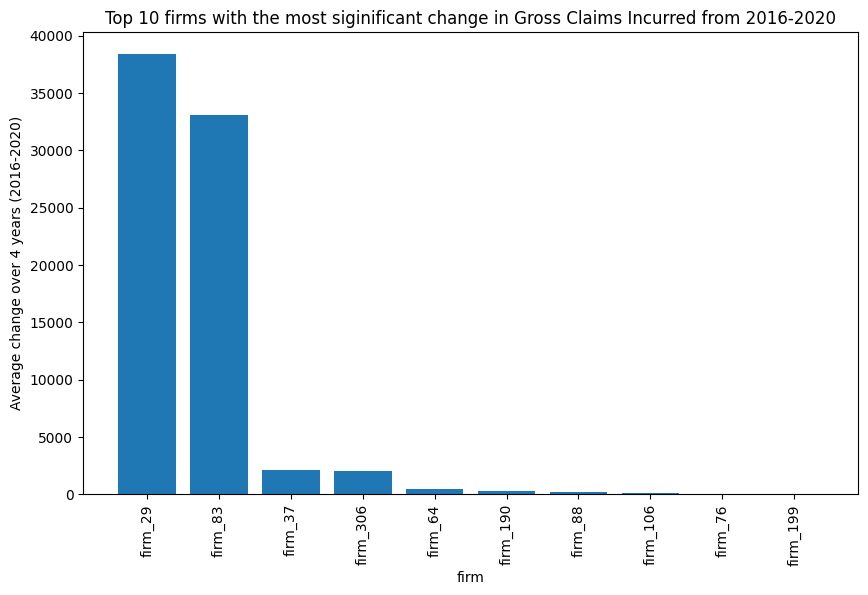

In [417]:
plt.figure(figsize=(10,6))
plt.bar(top20_gci_change['firm'], top20_gci_change['average_change'])
plt.xlabel('firm')
plt.ylabel('Average change over 4 years (2016-2020)')
plt.title('Top 10 firms with the most siginificant change in Gross Claims Incurred from 2016-2020')
plt.xticks(rotation=90)
plt.show()


## SCR Coverage ratio

In [518]:
df_new.columns

Index(['nwp_(£m)_2016ye', 'nwp_(£m)_2017ye', 'nwp_(£m)_2018ye',
       'nwp_(£m)_2019ye', 'nwp_(£m)_2020ye', 'scr_coverage_ratio_2016ye',
       'scr_coverage_ratio_2017ye', 'scr_coverage_ratio_2018ye',
       'scr_coverage_ratio_2019ye', 'scr_coverage_ratio_2020ye',
       'gwp_(£m)_2016ye', 'gwp_(£m)_2017ye', 'gwp_(£m)_2018ye',
       'gwp_(£m)_2019ye', 'gwp_(£m)_2020ye',
       'excess_of_assets_over_liabilities_(£m)_[=_equity]_2016ye',
       'excess_of_assets_over_liabilities_(£m)_[=_equity]_2017ye',
       'excess_of_assets_over_liabilities_(£m)_[=_equity]_2018ye',
       'excess_of_assets_over_liabilities_(£m)_[=_equity]_2019ye',
       'excess_of_assets_over_liabilities_(£m)_[=_equity]_2020ye',
       'gross_claims_incurred_(£m)_2016ye',
       'gross_claims_incurred_(£m)_2017ye',
       'gross_claims_incurred_(£m)_2018ye',
       'gross_claims_incurred_(£m)_2019ye',
       'gross_claims_incurred_(£m)_2020ye', 'net_combined_ratio_2016ye',
       'net_combined_ratio_2017ye', 'ne

In [519]:
scr_cols = [i for i in (df_new.columns) if "scr_coverage_ratio" in i]
scr_df = df_new[scr_cols]

In [520]:
scr_df['average_scr_coverage_ratio'] = scr_df.mean(axis=1) 

/var/folders/0k/g6vhmrs974937h1lwrj16q5c0000gn/T/ipykernel_7328/3647312989.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  scr_df['average_scr_coverage_ratio'] = scr_df.mean(axis=1)


In [522]:
scr_df = scr_df.merge(firms_null, left_index=True, right_index=True, how='left')

In [523]:
scr_df.head(10)

scr_coverage_ratio_2016ye  scr_coverage_ratio_2017ye  \
1                       5.650                      3.680   
2                       1.140                      1.710   
3                       0.680                      1.220   
4                       1.460                      4.960   
5                       0.040                      0.620   
6                       1.650                      0.080   
7                       1.048                      2.906   
8                       3.490                      2.420   
9                       1.250                      0.670   
11                      5.120                      3.260   

    scr_coverage_ratio_2018ye  scr_coverage_ratio_2019ye  \
1                      10.240                      5.790   
2                       1.220                      1.350   
3                       2.700                      2.030   
4                       3.230                      4.340   
5                       1.100                      2.230   
6                       1.910                      2.300   
7                       1.812                      1.452   
8                       0.600                      3.930   
9                       1.960                      1.110   
11                      5.740                      2.290   

    scr_coverage_ratio_2020ye  average_scr_coverage_ratio     firm  
1                       3.170                      5.7060   firm_2  
2                       0.250                      1.1340   firm_3  
3                       1.200                      1.5660   firm_4  
4                       1.620                      3.1220   firm_5  
5                       2.500                      1.2980   firm_6  
6                       0.100                      1.2080   firm_7  
7                       1.054                      1.6544   firm_8  
8                       0.260                      2.1400   firm_9  
9                       0.600                      1.1180  firm_10  
11                      0.830                      3.4480  firm_12

In [524]:
scr_df_head10 = scr_df.sort_values(by='average_scr_coverage_ratio', ascending=False).head(10)

In [525]:
scr_df_head10

scr_coverage_ratio_2016ye  scr_coverage_ratio_2017ye  \
111                      2.396               1.998606e+08   
197                      5.106               1.117740e+07   
126                      4.218               2.258551e+05   
290                    170.160               6.854000e+01   
318                     68.400               2.165000e+01   
102                     44.410               1.153000e+01   
185                      5.560               4.229000e+01   
322                      2.060               5.300000e+00   
17                      10.360               2.917000e+01   
162                     12.460               2.187000e+01   

     scr_coverage_ratio_2018ye  scr_coverage_ratio_2019ye  \
111                      2.352                      1.832   
197                  33730.726                  16910.298   
126                 168645.750                  84538.370   
290                    102.450                    125.190   
318                     31.720                     32.710   
102                      2.600                     66.240   
185                     42.740                     24.780   
322                     22.540                     67.280   
17                      14.840                     26.170   
162                     21.530                     23.510   

     scr_coverage_ratio_2020ye  average_scr_coverage_ratio      firm  
111                      0.902                3.997212e+07  firm_112  
197                  17906.672                2.249191e+06  firm_198  
126                  89529.280                1.137145e+05  firm_127  
290                     15.488                9.636560e+01  firm_291  
318                      9.502                3.279640e+01  firm_319  
102                     10.240                2.700400e+01  firm_103  
185                     10.570                2.518800e+01  firm_186  
322                      0.610                1.955800e+01  firm_323  
17                      15.496                1.920720e+01   firm_18  
162                     15.922                1.905840e+01  firm_163

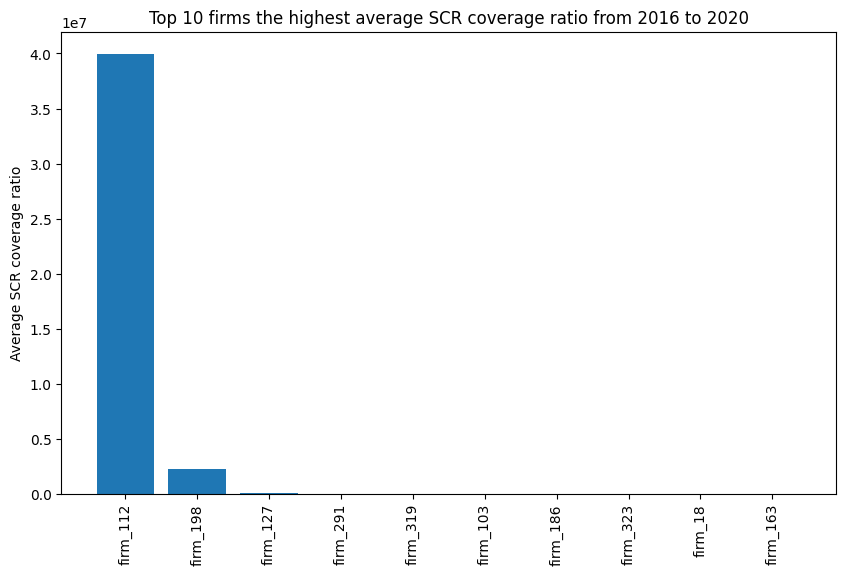

In [526]:
plt.figure(figsize=(10,6))
plt.bar(scr_df_head10['firm'], scr_df_head10['average_scr_coverage_ratio'])
plt.ylabel('Average SCR coverage ratio')
plt.title('Top 10 firms the highest average SCR coverage ratio from 2016 to 2020')
plt.xticks(rotation=90)
plt.show()

In [527]:
scr_df_head7 = scr_df_head10.drop([111, 197, 126])

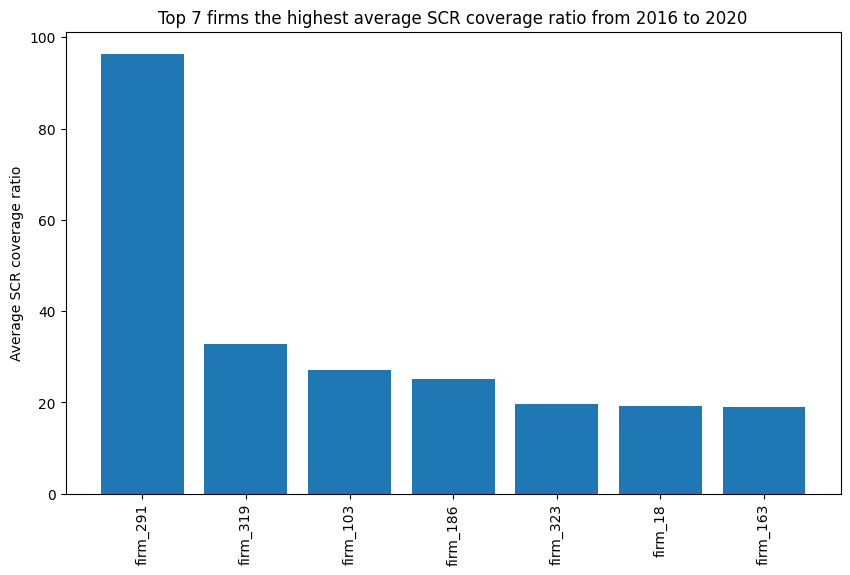

In [529]:
plt.figure(figsize=(10,6))
plt.bar(scr_df_head7['firm'], scr_df_head7['average_scr_coverage_ratio'])
plt.ylabel('Average SCR coverage ratio')
plt.title('Top 7 firms the highest average SCR coverage ratio from 2016 to 2020')
plt.xticks(rotation=90)
plt.show()

In [600]:
scr_df_tail10 = scr_df[scr_df['average_scr_coverage_ratio']  >= 0]

In [601]:
scr_df_tail10 = scr_df_tail10.sort_values(by='average_scr_coverage_ratio', ascending=False)

In [602]:
scr_df_tail10 = scr_df_tail10.tail(10)

In [603]:
scr_df_tail10

scr_coverage_ratio_2016ye  scr_coverage_ratio_2017ye  \
226                       0.72                       0.65   
210                       0.69                       1.50   
262                       0.79                       0.50   
199                       0.76                       0.64   
85                        0.48                       0.03   
63                        0.25                       0.39   
285                       0.23                       0.07   
255                      -0.03                       0.19   
82                        0.51                       0.03   
212                      -0.10                       0.09   

     scr_coverage_ratio_2018ye  scr_coverage_ratio_2019ye  \
226                       1.03                       1.32   
210                       0.06                       0.44   
262                       0.13                       0.52   
199                       0.09                       1.14   
85                        0.40                       0.25   
63                        0.15                       0.29   
285                       0.37                       1.58   
255                       0.29                       0.46   
82                        0.55                       0.14   
212                       0.07                       1.01   

     scr_coverage_ratio_2020ye  average_scr_coverage_ratio      firm  
226                      0.280                      0.8000  firm_227  
210                      0.760                      0.6900  firm_211  
262                      1.400                      0.6680  firm_263  
199                      0.520                      0.6300  firm_200  
85                       1.910                      0.6140   firm_86  
63                       1.878                      0.5916   firm_64  
285                      0.370                      0.5240  firm_286  
255                      1.690                      0.5200  firm_256  
82                       0.760                      0.3980   firm_83  
212                      0.060                      0.2260  firm_213

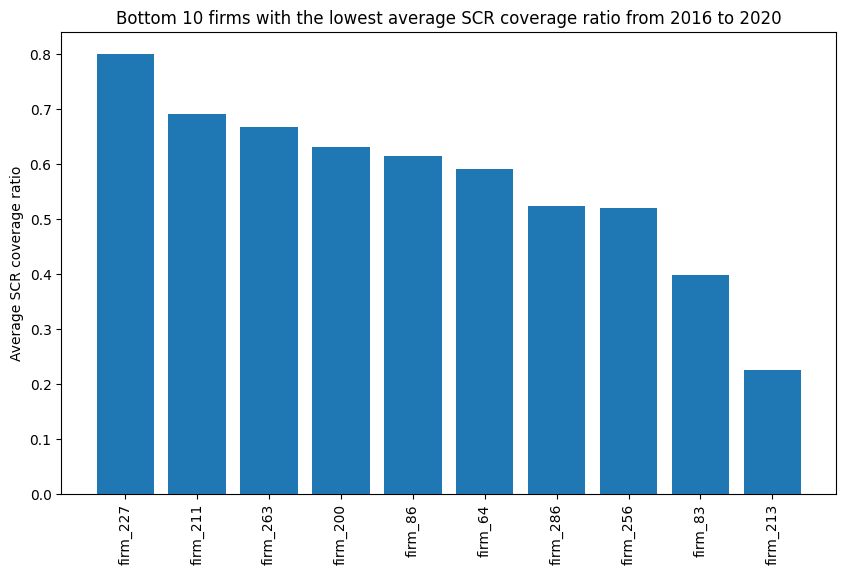

In [604]:
plt.figure(figsize=(10,6))
plt.bar(scr_df_tail10['firm'], scr_df_tail10['average_scr_coverage_ratio'])
plt.ylabel('Average SCR coverage ratio')
plt.title('Bottom 10 firms with the lowest average SCR coverage ratio from 2016 to 2020')
plt.xticks(rotation=90)
plt.show()

## Net combined ratio

In [467]:
ncr_cols = [i for i in (df_new.columns) if "net_combined_ratio" in i]
ncr_df = df_new[ncr_cols]

In [469]:
ncr_df['net_combined_ratio_average'] = ncr_df.mean(axis=1)

/var/folders/0k/g6vhmrs974937h1lwrj16q5c0000gn/T/ipykernel_7328/2973890336.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ncr_df['net_combined_ratio_average'] = ncr_df.mean(axis=1)


In [571]:
ncr_df = ncr_df.merge(firms_null, left_index=True, right_index=True, how='left').head(10)

In [572]:
ncr_df.to_csv('/Users/kayiko98/Documents/boe_assessment/data/net_combined_ratio.csv', index=True)

In [473]:
ncfr_top10 = ncr_df.sort_values(by='net_combined_ratio_average', ascending=False).head(10)

In [476]:
ncfr_top10 = ncfr_top10.merge(firms_null, left_index=True, right_index=True, how='left')

In [477]:
ncfr_top10

net_combined_ratio_2016ye  net_combined_ratio_2017ye  \
69                    8.063546                3157.376935   
227                   9.164847                   4.040580   
165                 144.452073                  -2.262874   
161                  -0.238117                 649.340338   
63                   -0.822830                 635.246163   
26                    2.405960                 635.309117   
154                  10.224688                 631.940794   
89                    2.669351                 631.944826   
191                   0.744335                 632.244616   
291                  23.748773                  -2.566041   

     net_combined_ratio_2018ye  net_combined_ratio_2019ye  \
69                    5.646093                   4.216687   
227                   3.764511                 173.339392   
165                   1.348586                -112.901570   
161                 466.001577                   7.386923   
63                    8.626127                  -1.151153   
26                    8.457254                   1.300339   
154                   0.944907                   3.146640   
89                    1.292986                   0.863883   
191                   1.669126                   0.595667   
291                   7.064045                 172.724254   

     net_combined_ratio_2020ye  net_combined_ratio_average      firm  
69                  332.825042                  701.625661   firm_70  
227                1642.927280                  366.647322  firm_228  
165                1222.879483                  250.703139  firm_166  
161                   5.392554                  225.576655  firm_162  
63                  245.893163                  177.558294   firm_64  
26                    3.256594                  130.145853   firm_27  
154                   2.534972                  129.758400  firm_155  
89                    0.452851                  127.444779   firm_90  
191                   1.155669                  127.281883  firm_192  
291                 326.718271                  105.537861  firm_292

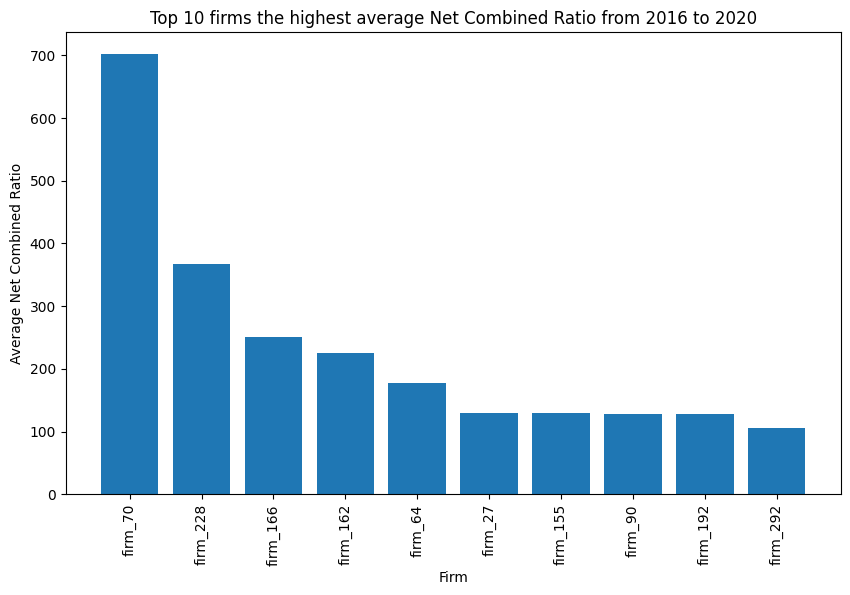

In [482]:
plt.figure(figsize=(10,6))
plt.bar(ncfr_top10['firm'], ncfr_top10['net_combined_ratio_average'])
plt.xlabel('Firm')
plt.ylabel('Average Net Combined Ratio')
plt.title('Top 10 firms the highest average Net Combined Ratio from 2016 to 2020')
plt.xticks(rotation=90)
plt.show()

In [552]:
ncfr_bot10 = ncr_df.sort_values(by='net_combined_ratio_average', ascending=False)

In [555]:
ncfr_bot10_pos = ncfr_bot10[ncfr_bot10['net_combined_ratio_average'] > 0]

In [556]:
ncfr_bot10_pos = ncfr_bot10_pos.merge(firms_null, left_index=True, right_index=True, how='left')

In [559]:
ncfr_bot10_pos = ncfr_bot10_pos.tail(10)

In [560]:
ncfr_bot10_pos

net_combined_ratio_2016ye  net_combined_ratio_2017ye  \
126                  -2.276228                   1.277378   
20                    0.416415                   0.204714   
239                   0.157193                   0.082565   
11                    0.301593                   0.481737   
194                  -2.463854                   0.733699   
189                  -0.373239                  -0.624151   
99                    0.256130                   0.022974   
246                   0.791151                   0.091701   
233                   0.394130                   0.009037   
57                   -2.476119                   0.695561   

     net_combined_ratio_2018ye  net_combined_ratio_2019ye  \
126                   0.961720                   1.037671   
20                    0.575248                   0.071864   
239                   0.078949                   0.548730   
11                    0.224502                   0.415322   
194                   1.301916                   1.301642   
189                   0.579483                   1.929606   
99                    0.313164                   0.921625   
246                   0.281600                   0.329723   
233                   0.155449                   0.401130   
57                    0.895521                   0.542766   

     net_combined_ratio_2020ye  net_combined_ratio_average      firm  
126                   1.318057                    0.463720  firm_127  
20                    0.981922                    0.450033   firm_21  
239                   1.306123                    0.434712  firm_240  
11                    0.504933                    0.385617   firm_12  
194                   0.873011                    0.349283  firm_195  
189                   0.211832                    0.344706  firm_190  
99                    0.042478                    0.311274  firm_100  
246                   0.001457                    0.299126  firm_247  
233                   0.006348                    0.193219  firm_234  
57                    0.973119                    0.126170   firm_58

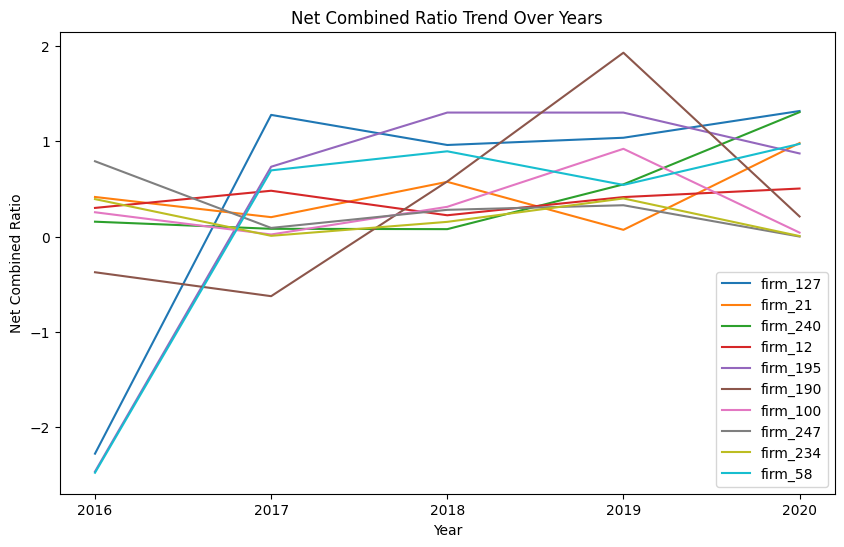

In [562]:
columns = ['net_combined_ratio_2016ye', 'net_combined_ratio_2017ye', 'net_combined_ratio_2018ye', 'net_combined_ratio_2019ye', 'net_combined_ratio_2020ye']
years = [2016, 2017, 2018, 2019, 2020]

plt.figure(figsize=(10,6))

# Loop through each firm
for firm in ncfr_bot10_pos['firm'].unique():
    firm_data = ncfr_bot10_pos[ncfr_bot10_pos['firm'] == firm]
    plt.plot(years, firm_data[columns].values[0], label=firm)

plt.xlabel('Year')
plt.ylabel('Net Combined Ratio')
plt.title('Net Combined Ratio Trend Over Years')

plt.xticks(years)
plt.legend()
plt.show()

# Junk - ignore

In [374]:
# plt.figure(figsize=(16,5))
# sns.distplot(df_filled["nwp_(£m)_2016ye"], bins=100)
# plt.show()

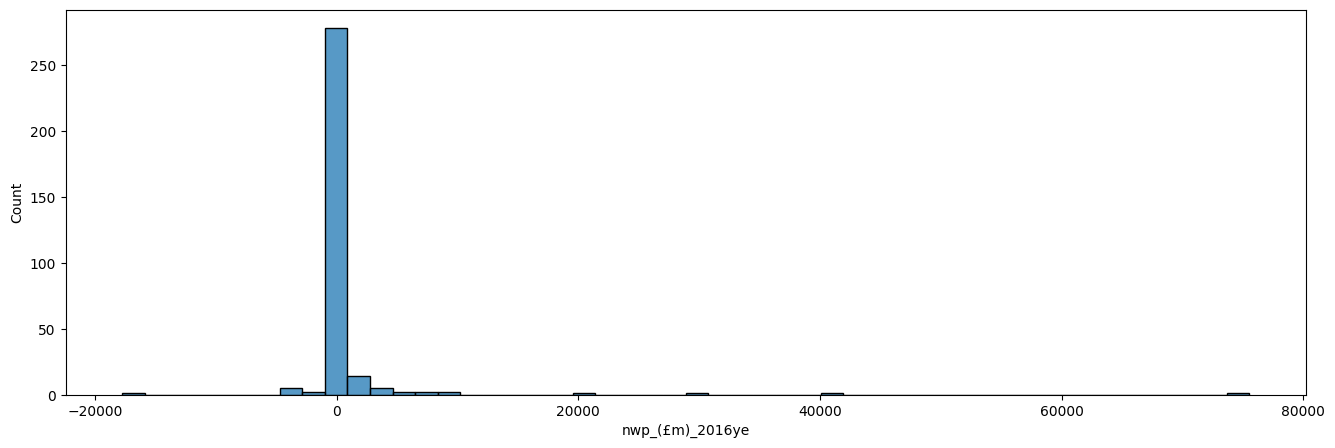

In [375]:
plt.figure(figsize=(16,5))
sns.histplot(df_filled["nwp_(£m)_2016ye"], bins=50)
plt.show()

In [376]:
# df_filled["nwp_(£m)_2016ye"].mean()

In [377]:
# # Test
# scaler = StandardScaler()
# df_filled['test'] = scaler.fit_transform(df_filled[["nwp_(£m)_2016ye"]])


In [378]:
# df_filled['test']

In [379]:
# plt.figure(figsize=(16,5))
# sns.histplot(df_filled['test'], bins=50)
# plt.show()

In [380]:
get_outliers(df_filled, 'nwp_(£m)_2018ye')

3      20885.510
5       3215.470
6        713.850
7       1622.150
9       6640.430
16      1620.220
22      2043.250
23       897.380
24      1227.710
25     11251.350
29      9063.120
33      3530.840
37      1666.570
50      3812.030
72      6813.490
75      4530.020
78       682.146
79      1744.480
81       563.090
86       672.970
100     2397.450
103    18870.460
106     3969.080
119     6902.890
130     2882.222
138     1013.570
149      993.390
150    12231.910
157     1004.660
171      940.090
178      537.280
187     3059.390
197     3817.218
198    11509.510
209    41591.400
215      629.466
220     2877.090
233     1155.110
241      860.090
246     6237.270
260     3834.948
265      860.370
266      706.550
271      723.060
275     2565.770
280     1286.900
294     2629.880
300      615.720
310    12734.770
315     -368.820
316     4838.900
321     2192.750
Name: nwp_(£m)_2018ye, dtype: float64

In [381]:
negative_val_nwp_2018 = df_filled['nwp_(£m)_2018ye'][df_filled['nwp_(£m)_2018ye'] < 0]
negative_val_nwp_2018

54      -5.160
60      -4.750
61     -38.530
92      -0.030
104    -11.980
143     -0.040
148    -11.010
205    -13.416
276     -0.160
315   -368.820
320     -0.170
Name: nwp_(£m)_2018ye, dtype: float64

In [382]:
# shap_wilk_dict = []
# col = list(df_filled.columns)

# for i in col:
#     res = stats.shapiro(df_filled[i])
#     score = res.statistic
#     dict = {'col_name': i, 'shap_wilk_score': score}
#     shap_wilk_dict.append(dict)
    

In [383]:
def get_all_outliers(df, col_list):
    """x

    Args:
        xx

    Returns:
        x

    """
    outliers_all = pd.DataFrame()
    for col in col_list: 
        outliers_single = get_outliers(df_filled, col)
        col_name = str(col)
        outlier_df_single = outliers_single.to_frame(col_name)
        outliers_all = outliers_all.merge(outlier_df_single, left_index=True, right_index=True, how = 'outer')

    return outliers_all
    

In [384]:
df_col_list = list(df_filled.columns)
all_outliers_df = get_all_outliers(df_filled, df_col_list)

In [385]:
all_outliers_df

nwp_(£m)_2016ye  nwp_(£m)_2017ye  nwp_(£m)_2018ye  nwp_(£m)_2019ye  \
0         -17754.100              NaN              NaN              NaN   
1                NaN              NaN              NaN              NaN   
2                NaN              NaN              NaN              NaN   
3          19677.450        41072.820        20885.510        14719.670   
4                NaN              NaN              NaN              NaN   
5           3091.390         3357.930         3215.470              NaN   
6           3148.480         3307.130          713.850        18232.380   
7                NaN          772.452         1622.150         1413.288   
8                NaN              NaN              NaN              NaN   
9            404.120         3882.090         6640.430         5196.620   
10         -3402.040              NaN              NaN              NaN   
15               NaN              NaN              NaN              NaN   
16          5210.940         1146.930         1620.220         1256.930   
17               NaN              NaN              NaN              NaN   
18           357.184              NaN              NaN         2006.290   
19               NaN              NaN              NaN              NaN   
20               NaN              NaN              NaN              NaN   
21               NaN              NaN              NaN              NaN   
22           982.260          634.610         2043.250         5085.700   
23               NaN              NaN          897.380              NaN   
24          9622.280         2356.630         1227.710         7134.650   
25         75526.670         2187.590        11251.350         6683.960   
26               NaN              NaN              NaN              NaN   
27               NaN              NaN              NaN              NaN   
28               NaN              NaN              NaN              NaN   
29               NaN         5260.730         9063.120         6124.600   
30               NaN              NaN              NaN              NaN   
31               NaN              NaN              NaN              NaN   
32               NaN              NaN              NaN              NaN   
33         10135.260         3630.290         3530.840              NaN   
34               NaN              NaN              NaN              NaN   
35               NaN              NaN              NaN              NaN   
36               NaN              NaN              NaN              NaN   
37          6060.190         3345.290         1666.570          747.070   
38               NaN              NaN              NaN              NaN   
39               NaN          950.800              NaN              NaN   
42               NaN              NaN              NaN              NaN   
43               NaN              NaN              NaN              NaN   
44               NaN              NaN              NaN              NaN   
45               NaN              NaN              NaN              NaN   
46               NaN              NaN              NaN              NaN   
48               NaN              NaN              NaN              NaN   
49         -3490.460              NaN              NaN              NaN   
50               NaN              NaN         3812.030         5655.160   
51               NaN              NaN              NaN              NaN   
52               NaN              NaN              NaN              NaN   
53               NaN              NaN              NaN              NaN   
54               NaN              NaN              NaN              NaN   
55               NaN              NaN              NaN              NaN   
56               NaN              NaN              NaN              NaN   
57               NaN              NaN              NaN              NaN   
59               NaN              NaN              NaN              NaN   
60               NaN          

There are 245 rows with outliers. We should not remove every row with an outlier.